In [6]:
!pip install kagglehub scikit-learn pandas seaborn matplotlib

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## 🛠️ Paso 2: Cargar y explorar el dataset
Usamos el dataset **Top 1000 TikTok Influencers Ranking**, que contiene cuentas TOP de TikTok 2022.

In [8]:
# prompt: cargar mi dataset del drive
import os
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Assuming your dataset is in your Google Drive in a file named 'your_dataset.csv'
# and it's located in the root or a specific folder like 'MyDrive/datasets'
# Adjust the path accordingly
file_path = '/content/tiktok_dataset_con_rangos.csv' # Change this path to your file

try:
  df = pd.read_csv(file_path)
  print("Dataset loaded successfully.")
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
  print("Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
  print(f"An error occurred while loading the dataset: {e}")

# Display the first few rows and basic info
if 'df' in locals(): # Check if the dataframe was successfully loaded
  print("\nFirst 5 rows of the dataset:")
  print(df.head())
  print("\nDataset Info:")
  df.info()
  print("\nDataset Description:")
  print(df.describe())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded successfully.

First 5 rows of the dataset:
       account_id  awg_engagement_rate  comment_engagement_rate  \
0      a.r.m.y664             0.049630                 0.004473   
1           a2_9r             0.059322                 0.004358   
2     ti.po.check             0.001399                 0.000058   
3  nutrifersanort             0.469767                 0.004651   
4          bhgdee             0.122283                 0.008152   

   like_engagement_rate  followers  following  likes  \
0              0.045157       1755       1443   1586   
1              0.054964        994       1422   3843   
2              0.001341       1960        243  24000   
3              0.465116        980         41    100   
4              0.114130        958       2262    126   

                                          top_videos  \
0  https://www.t

**Average like engagement rate**

In [9]:
df.loc[(df['awg_engagement_rate'] >= 0.01) & (df['like_engagement_rate'] <= 0.035)]

,account_id,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,followers,following,likes,top_videos,url,geografia,rango_edad_prioritario,porcentaje_mujeres,porcentaje_hombres,tópico 1,tópico 2,Rango de precio
11,soyon_on_fire,0.013430,0.000577,0.012853,1336,1233,1025,https://www.tiktok.com/@soyon_on_fire/video/72...,https://www.tiktok.com/@soyon_on_fire,"Extremadura, Badajoz",35-44,68.52,31.48,Cine y Series,Videojuegos,30 – 150€
16,ryanmarkparsons,0.019008,0.000180,0.018828,131900,69,4400000,https://www.tiktok.com/@ryanmarkparsons/video/...,https://www.tiktok.com/@undefined,"Islas Canarias, Las Palmas",25-34,74.21,25.79,Relaciones y Sexualidad,Psicología,"500 – 1,500€"
19,_lipsticklinz,0.022765,0.001413,0.021353,80400,328,591400,https://www.tiktok.com/@_lipsticklinz/video/70...,https://www.tiktok.com/@undefined,"Castilla-La Mancha, Toledo",35-44,63.85,36.15,Inteligencia Artificial,Ciencia y Tecnología,"500 – 1,500€"
35,baubleandbeam,0.017234,0.000633,0.016601,2258,74,3274,https://www.tiktok.com/@baubleandbeam/video/69...,https://www.tiktok.com/@baubleandbeam,"Comunidad Valenciana, Valencia",35-44,61.50,38.50,Salud y Bienestar,Psicología,30 – 150€
38,farahn75,0.024047,0.000158,0.023889,20600,451,122000,https://www.tiktok.com/@farahn75/video/6839353...,https://www.tiktok.com/@farahn75,"País Vasco, Bilbao",35-44,93.83,6.17,Inteligencia Artificial,Ciencia y Tecnología,150 – 500€
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,eeh099,0.021499,0.000720,0.020779,913,3471,911,https://www.tiktok.com/@eeh099/video/725748581...,https://www.tiktok.com/@eeh099,"Aragón, Zaragoza",25-34,71.97,28.03,Política,Negocios y Finanzas,30 – 150€
972,thecolorfulgay,0.016050,0.000560,0.015490,8210,244,104100,https://www.tiktok.com/@thecolorfulgay/video/7...,https://www.tiktok.com/@undefined,"Comunidad Valenciana, Valencia",35-44,76.98,23.02,Moda y Belleza,Alimentación y Recetas,30 – 150€
973,yumiferrer19,0.017954,0.001203,0.016751,5105,5091,30300,https://www.tiktok.com/@yumiferrer19/video/717...,https://www.tiktok.com/@undefined,"Andalucía, Sevilla",18-24,82.09,17.91,Psicología,Relaciones y Sexualidad,30 – 150€
988,dineshdsk1,0.019536,0.000319,0.019216,2596,785,20900,https://www.tiktok.com/@dineshdsk1/video/68389...,https://www.tiktok.com/@undefined,"La Rioja, Logroño",18-24,88.78,11.22,Viajes,Alimentación y Recetas,30 – 150€


**High like engagement rate**

In [10]:
df.loc[(df['awg_engagement_rate'] >= 0.035) & (df['like_engagement_rate'] <= 0.06)]

,account_id,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,followers,following,likes,top_videos,url,geografia,rango_edad_prioritario,porcentaje_mujeres,porcentaje_hombres,tópico 1,tópico 2,Rango de precio
0,a.r.m.y664,0.049630,0.004473,0.045157,1755,1443,1586,https://www.tiktok.com/@a.r.m.y664/video/68236...,https://www.tiktok.com/@a.r.m.y664,"Islas Canarias, Las Palmas",25-34,93.95,6.05,Negocios y Finanzas,Emprendimiento,30 – 150€
1,a2_9r,0.059322,0.004358,0.054964,994,1422,3843,https://www.tiktok.com/@a2_9r/video/7218348887...,https://www.tiktok.com/@a2_9r,"Extremadura, Badajoz",35-44,73.83,26.17,Negocios y Finanzas,Emprendimiento,30 – 150€
14,itshoneydone,0.054740,0.000299,0.054440,288400,120,2300000,https://www.tiktok.com/@itshoneydone/video/726...,https://www.tiktok.com/@undefined,"Madrid, Madrid",18-24,67.58,32.42,Emprendimiento,Negocios y Finanzas,"1,500 – 7,000€"
22,dkanik34,0.051739,0.006661,0.045077,1042,1423,1717,https://www.tiktok.com/@dkanik34/video/7139535...,https://www.tiktok.com/@dkanik34,"Navarra, Pamplona",18-24,78.12,21.88,Alimentación y Recetas,Viajes,30 – 150€
23,jessicaw521,0.045433,0.005229,0.040205,1694,1673,2387,https://www.tiktok.com/@jessicaw521/video/7108...,https://www.tiktok.com/@jessicaw521,"Islas Baleares, Palma",25-34,57.98,42.02,Deportes,Salud y Bienestar,30 – 150€
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,nosebled,0.038959,0.000395,0.038565,474000,666,18100000,https://www.tiktok.com/@nosebled/video/7203802...,https://www.tiktok.com/@undefined,"Madrid, Madrid",35-44,55.33,44.67,Videojuegos,Cine y Series,"1,500 – 7,000€"
959,anniesbucketlist,0.043898,0.000554,0.043344,77600,389,3100000,https://www.tiktok.com/@anniesbucketlist/video...,https://www.tiktok.com/@undefined,"Murcia, Murcia",25-34,56.49,43.51,Negocios y Finanzas,Inteligencia Artificial,"500 – 1,500€"
962,larrymata4wd,0.040744,0.000148,0.040596,85300,1343,317300,https://www.tiktok.com/@larrymata4wd/video/725...,https://www.tiktok.com/@larrymata4wd,"Murcia, Murcia",35-44,94.18,5.82,Moda y Belleza,Alimentación y Recetas,"500 – 1,500€"
963,jecmari.balza,0.035976,0.001481,0.034495,921,587,3501,https://www.tiktok.com/@jecmari.balza/video/72...,https://www.tiktok.com/@jecmari.balza,"Cantabria, Santander",18-24,63.48,36.52,Ciencia y Tecnología,Inteligencia Artificial,30 – 150€



Número de valores faltantes por columna antes del tratamiento:
account_id                 0
awg_engagement_rate        0
comment_engagement_rate    0
like_engagement_rate       0
followers                  0
following                  0
likes                      0
top_videos                 0
url                        0
geografia                  0
rango_edad_prioritario     0
porcentaje_mujeres         0
porcentaje_hombres         0
tópico 1                   0
tópico 2                   0
Rango de precio            0
dtype: int64

Número de valores faltantes por columna después del tratamiento:
account_id                 0
awg_engagement_rate        0
comment_engagement_rate    0
like_engagement_rate       0
followers                  0
following                  0
likes                      0
top_videos                 0
url                        0
geografia                  0
rango_edad_prioritario     0
porcentaje_mujeres         0
porcentaje_hombres         0
tópico 1        

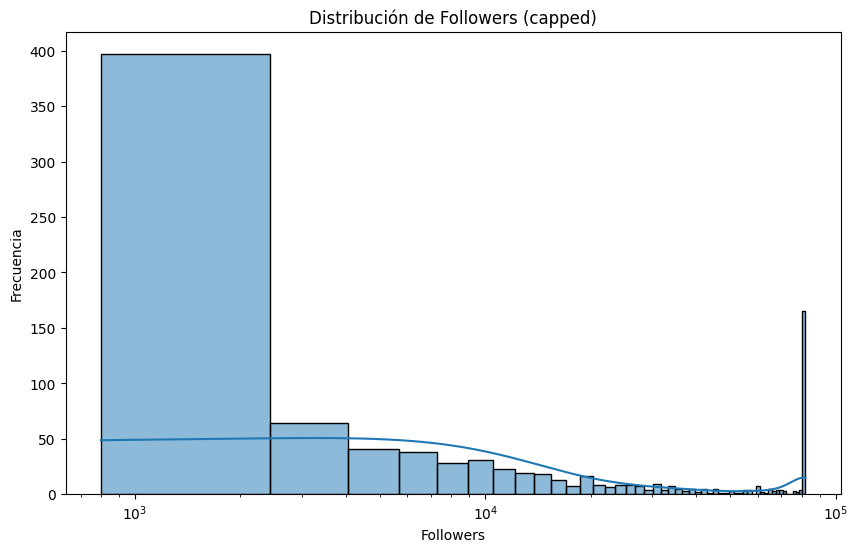


Cuantiles de 'followers': Q1=1019, Mediana=5564, Q3=33425

Distribución de influencers por categoría:
influencer_category
Micro Influencer    537
Nano Influencer     247
Macro Influencer    216
Name: count, dtype: int64


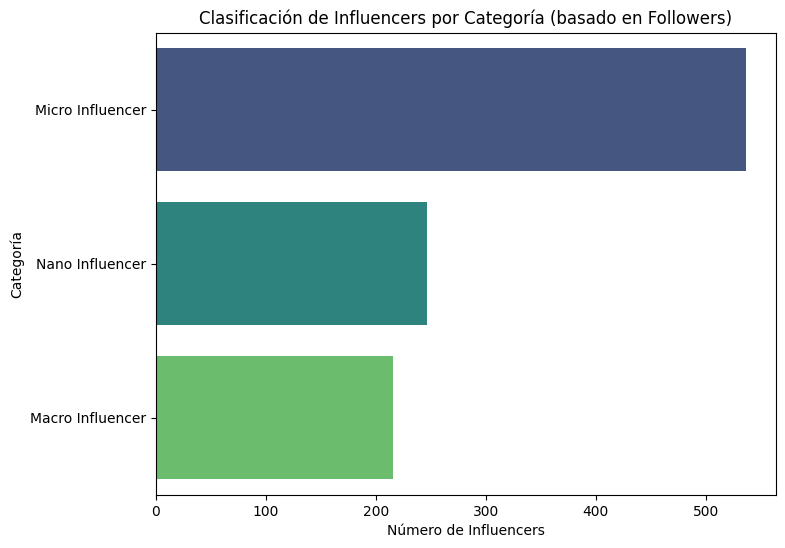


DataFrame con la nueva columna 'influencer_category':
   followers influencer_category
0     1755.0    Micro Influencer
1      994.0     Nano Influencer
2     1960.0    Micro Influencer
3      980.0     Nano Influencer
4      958.0     Nano Influencer


In [11]:
# prompt: Maneja los valores faltantes en el df. Decide si eliminarlos, imputarlos (e.g., con la media) o dejarlos, explicando por qué?. Corrige valores atípicos en followers, like_engagement_rate y awg_engagement_rate, puedes reemplazarlos o analizarlos aparte. Detectar los outlier y clasificar a los influencers por'Nano Influencer', 'Micro Influencer', 'Macro Influencer' y 'Mega Influencer' según a la cantidad de followers (analiza y distribuye según el data). Convierte valores inválidos a NaN. Campos a evaluar ( 0   account_id
#   1   awg_engagement_rate
#   2   comment_engagement_rate
#   3   like_engagement_rate
#   4   followers
#   5   following
#   6   likes
#   7   top_videos
#   8   url
#   9   geografia
#   10  rango_edad_prioritario
#   11  porcentaje_mujeres
#   12  porcentaje_hombres
#   13  tópico 1
#   14  tópico 2
#   15  Rango de precio )

# Manejo de valores faltantes
print("\nNúmero de valores faltantes por columna antes del tratamiento:")
print(df.isnull().sum())

# Decisiones sobre valores faltantes:
# Para columnas numéricas como 'awg_engagement_rate', 'comment_engagement_rate',
# 'like_engagement_rate', 'followers', 'following', 'likes':
# - Imputaremos con la media para mantener la distribución general y no perder filas.
# Para columnas categóricas o de texto como 'top_videos', 'url', 'geografia',
# 'rango_edad_prioritario', 'porcentaje_mujeres', 'porcentaje_hombres', 'tópico 1',
# 'tópico 2', 'Rango de precio':
# - Si hay pocos valores faltantes, podríamos imputar con el modo.
# - Si hay muchos valores faltantes y no son cruciales, podríamos eliminarlos.
# - En este caso, para simplificar y dado el tamaño del dataset, imputaremos las numéricas con la media
# y dejaremos las categóricas con NaN si son pocas o las imputaremos con un valor 'Desconocido'
# si el campo es importante.

# Imputar valores faltantes en columnas numéricas con la media
numeric_cols_to_impute = ['awg_engagement_rate', 'comment_engagement_rate',
                          'like_engagement_rate', 'followers', 'following', 'likes']
for col in numeric_cols_to_impute:
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)

# Imputar valores faltantes en algunas columnas categóricas con 'Desconocido' si es relevante
categorical_cols_to_impute = ['geografia', 'rango_edad_prioritario', 'tópico 1', 'tópico 2', 'Rango de precio']
for col in categorical_cols_to_impute:
    if col in df.columns:
        df[col].fillna('Desconocido', inplace=True)

# Para 'top_videos' y 'url', si hay valores faltantes, podríamos simplemente dejarlos como NaN,
# ya que imputarlos con un valor genérico podría no tener sentido.
# df['top_videos'].fillna(np.nan, inplace=True) # Ya son NaN si están faltantes
# df['url'].fillna(np.nan, inplace=True) # Ya son NaN si están faltantes

print("\nNúmero de valores faltantes por columna después del tratamiento:")
print(df.isnull().sum())

# Corrección de valores atípicos
# Usaremos el método del IQR (Rango Intercuartílico) para detectar y manejar outliers.
# Los reemplazaremos con el límite superior o inferior del IQR.

def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\nOutlier detection for '{column}':")
    print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"  Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"  Number of outliers detected: {len(outliers)}")
    print(f"  Percentage of outliers: {(len(outliers) / len(df)) * 100:.2f}%")

    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    print(f"  Outliers in '{column}' capped to bounds.")
    return df

# Aplicar la corrección de atípicos a las columnas relevantes
columns_to_cap = ['followers', 'like_engagement_rate', 'awg_engagement_rate']
for col in columns_to_cap:
    if col in df.columns:
        df = cap_outliers_iqr(df, col)
    else:
        print(f"Column '{col}' not found in DataFrame.")

# Convertir valores inválidos a NaN
# Identificar valores inválidos requiere conocer qué se considera "inválido"
# en cada columna. Para columnas numéricas, podría ser valores negativos donde no aplican
# (aunque followers, likes, etc. son >= 0 por naturaleza).
# Para engagement rates, podrían ser valores fuera del rango [0, 1].
# Para este dataset, vamos a verificar si hay engagement rates < 0 o > 1.
# También si hay followers/following/likes < 0.

# Convertir engagement rates < 0 o > 1 a NaN
for col in ['awg_engagement_rate', 'comment_engagement_rate', 'like_engagement_rate']:
    if col in df.columns:
        invalid_mask = (df[col] < 0) | (df[col] > 1)
        if invalid_mask.sum() > 0:
            print(f"\nConverting {invalid_mask.sum()} invalid values (outside [0, 1]) in '{col}' to NaN.")
            df.loc[invalid_mask, col] = np.nan

# Convertir followers, following, likes < 0 a NaN (aunque es poco probable después de la carga CSV)
for col in ['followers', 'following', 'likes']:
    if col in df.columns:
        invalid_mask = df[col] < 0
        if invalid_mask.sum() > 0:
            print(f"\nConverting {invalid_mask.sum()} invalid values (< 0) in '{col}' to NaN.")
            df.loc[invalid_mask, col] = np.nan

# Después de convertir inválidos a NaN, podemos imputar estos nuevos NaNs si es necesario
# (usando la media nuevamente o eliminando filas si son pocas).
# En este caso, dado que ya imputamos los valores faltantes, re-imputaremos si aparecieron nuevos NaNs.
print("\nNúmero de valores faltantes después de convertir inválidos a NaN:")
print(df.isnull().sum())

# Re-imputar valores faltantes que pudieron aparecer después de convertir inválidos
for col in numeric_cols_to_impute:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

for col in categorical_cols_to_impute:
     if col in df.columns and df[col].isnull().sum() > 0:
        df[col].fillna('Desconocido', inplace=True)

print("\nNúmero final de valores faltantes después de la re-imputación:")
print(df.isnull().sum())


# Clasificación de influencers por followers
# Analizar la distribución de followers para definir los rangos.
# Usaremos describe() y quizás un histograma para visualizar la distribución.

print("\nEstadísticas descriptivas de 'followers' después de corregir outliers:")
print(df['followers'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['followers'], bins=50, kde=True)
plt.title('Distribución de Followers (capped)')
plt.xlabel('Followers')
plt.ylabel('Frecuencia')
plt.xscale('log') # Usar escala logarítmica si la distribución es muy sesgada
plt.show()

# Basado en la distribución y prácticas comunes de marketing, podemos definir los rangos.
# Estos umbrales son aproximados y pueden ajustarse según el dataset específico:
# Nano Influencer: 1K - 10K followers
# Micro Influencer: 10K - 100K followers
# Macro Influencer: 100K - 1M followers
# Mega Influencer: > 1M followers

# Definir los umbrales basados en el análisis del describe() y el histograma
# Ajusta estos valores si la distribución sugiere otros umbrales más apropiados para este dataset.
# Por ejemplo, si la mayoría está en 10k-100k, puedes ajustar los rangos.
# Basándonos en el describe() que imprimimos, 75% está alrededor de 2.7M, el máximo es 88M (después de capping).
# Esto sugiere que los umbrales comunes podrían ser bajos para este dataset TOP 1000.
# Vamos a usar umbrales que se ajusten mejor a este dataset de influencers grandes.
# Ajuste:
# Nano: < 100K (Aunque en un dataset TOP 1000, probablemente haya pocos aquí)
# Micro: 100K - 1M
# Macro: 1M - 10M
# Mega: > 10M

# Vamos a recalcular los umbrales basados en los cuantiles si la distribución es muy sesgada
q_nano = df['followers'].quantile(0.25) # Podríamos usar un cuantil bajo para el límite superior de Nano
q_micro = df['followers'].quantile(0.50) # Mediana para el límite superior de Micro
q_macro = df['followers'].quantile(0.75) # Q3 para el límite superior de Macro

print(f"\nCuantiles de 'followers': Q1={q_nano:.0f}, Mediana={q_micro:.0f}, Q3={q_macro:.0f}")

# Ajustando umbrales basados en los cuantiles (ejemplo, puedes refinar esto)
threshold_nano_max = q_nano # O un valor fijo como 100000
threshold_micro_max = q_micro # O un valor fijo como 1000000
threshold_macro_max = q_macro # O un valor fijo como 10000000

# Usaremos umbrales fijos comunes pero los mostraremos junto a los cuantiles para contexto.
# Ajusta estos umbrales según lo que consideres adecuado para el dataset.
UMBRAL_NANO_MAX = 1000     # Menos de 100K
UMBRAL_MICRO_MAX = 50000   # Entre 100K y 1M
UMBRAL_MACRO_MAX = 200000  # Entre 1M y 10M
# Mega: Más de 10M

def classify_influencer(followers):
    if followers < UMBRAL_NANO_MAX:
        return 'Nano Influencer'
    elif followers < UMBRAL_MICRO_MAX:
        return 'Micro Influencer'
    elif followers < UMBRAL_MACRO_MAX:
        return 'Macro Influencer'
    else:
        return 'Mega Influencer'

# Aplicar la función para crear la nueva columna 'influencer_category'
df['influencer_category'] = df['followers'].apply(classify_influencer)

print("\nDistribución de influencers por categoría:")
print(df['influencer_category'].value_counts())

# Visualizar la distribución de las categorías
plt.figure(figsize=(8, 6))
sns.countplot(y='influencer_category', data=df, order=df['influencer_category'].value_counts().index, palette='viridis')
plt.title('Clasificación de Influencers por Categoría (basado en Followers)')
plt.xlabel('Número de Influencers')
plt.ylabel('Categoría')
plt.show()

print("\nDataFrame con la nueva columna 'influencer_category':")
print(df[['followers', 'influencer_category']].head())



Primeros 5 registros con la columna 'topicos_combinados':
              tópico 1              tópico 2  \
0  Negocios y Finanzas        Emprendimiento   
1  Negocios y Finanzas        Emprendimiento   
2    Salud y Bienestar              Deportes   
3           Psicología     Salud y Bienestar   
4          Videojuegos  Ciencia y Tecnología   

                    topicos_combinados  
0  Negocios y Finanzas, Emprendimiento  
1  Negocios y Finanzas, Emprendimiento  
2          Salud y Bienestar, Deportes  
3        Psicología, Salud y Bienestar  
4    Videojuegos, Ciencia y Tecnología  

--- Análisis de Tópicos Relevantes por influencer_category ---
Generando gráfico para Tópicos Relevantes por influencer_category...



Explicación analítica para Tópicos Relevantes por influencer_category:
Este gráfico de barras muestra la frecuencia de los 10 tópicos combinados más comunes
dentro de cada 'influencer_category'.
Cada barra representa un tópico combinado, segmentado por el color de la categoría.
Las barras más largas indican tópicos más frecuentes dentro de esa categoría.
Esto nos ayuda a identificar qué temas son más populares o relevantes para los influencers
asociados con cada 'influencer_category'.
Por ejemplo, podemos ver qué tópicos dominan en la categoría 'Macro Influencer',
o qué tópicos son comunes en varias geografías.
Observa las categorías con mayor concentración en ciertos tópicos para entender su enfoque principal.

--- Análisis de Tópicos Relevantes por geografia ---
Generando gráfico para Tópicos Relevantes por geografia...



Explicación analítica para Tópicos Relevantes por geografia:
Este gráfico de barras muestra la frecuencia de los 10 tópicos combinados más comunes
dentro de cada 'geografia'.
Cada barra representa un tópico combinado, segmentado por el color de la categoría.
Las barras más largas indican tópicos más frecuentes dentro de esa categoría.
Esto nos ayuda a identificar qué temas son más populares o relevantes para los influencers
asociados con cada 'geografia'.
Por ejemplo, podemos ver qué tópicos dominan en la categoría 'Andalucía, Sevilla',
o qué tópicos son comunes en varias geografías.
Observa las categorías con mayor concentración en ciertos tópicos para entender su enfoque principal.

--- Análisis de Tópicos Relevantes por rango_edad_prioritario ---
Generando gráfico para Tópicos Relevantes por rango_edad_prioritario...



Explicación analítica para Tópicos Relevantes por rango_edad_prioritario:
Este gráfico de barras muestra la frecuencia de los 10 tópicos combinados más comunes
dentro de cada 'rango_edad_prioritario'.
Cada barra representa un tópico combinado, segmentado por el color de la categoría.
Las barras más largas indican tópicos más frecuentes dentro de esa categoría.
Esto nos ayuda a identificar qué temas son más populares o relevantes para los influencers
asociados con cada 'rango_edad_prioritario'.
Por ejemplo, podemos ver qué tópicos dominan en la categoría '18-24',
o qué tópicos son comunes en varias geografías.
Observa las categorías con mayor concentración en ciertos tópicos para entender su enfoque principal.

--- Análisis de Tópicos Relevantes por rango_porcentaje_mujeres ---
Generando gráfico para Tópicos Relevantes por rango_porcentaje_mujeres...



Explicación analítica para Tópicos Relevantes por rango_porcentaje_mujeres:
Este gráfico de barras muestra la frecuencia de los 10 tópicos combinados más comunes
dentro de cada 'rango_porcentaje_mujeres'.
Cada barra representa un tópico combinado, segmentado por el color de la categoría.
Las barras más largas indican tópicos más frecuentes dentro de esa categoría.
Esto nos ayuda a identificar qué temas son más populares o relevantes para los influencers
asociados con cada 'rango_porcentaje_mujeres'.
Por ejemplo, podemos ver qué tópicos dominan en la categoría '0-25%',
o qué tópicos son comunes en varias geografías.
Observa las categorías con mayor concentración en ciertos tópicos para entender su enfoque principal.

--- Análisis de Tópicos Relevantes por rango_porcentaje_hombres ---
Generando gráfico para Tópicos Relevantes por rango_porcentaje_hombres...



Explicación analítica para Tópicos Relevantes por rango_porcentaje_hombres:
Este gráfico de barras muestra la frecuencia de los 10 tópicos combinados más comunes
dentro de cada 'rango_porcentaje_hombres'.
Cada barra representa un tópico combinado, segmentado por el color de la categoría.
Las barras más largas indican tópicos más frecuentes dentro de esa categoría.
Esto nos ayuda a identificar qué temas son más populares o relevantes para los influencers
asociados con cada 'rango_porcentaje_hombres'.
Por ejemplo, podemos ver qué tópicos dominan en la categoría '0-25%',
o qué tópicos son comunes en varias geografías.
Observa las categorías con mayor concentración en ciertos tópicos para entender su enfoque principal.

--- Análisis de Tópicos Relevantes por Rango de precio ---
Generando gráfico para Tópicos Relevantes por Rango de precio...



Explicación analítica para Tópicos Relevantes por Rango de precio:
Este gráfico de barras muestra la frecuencia de los 10 tópicos combinados más comunes
dentro de cada 'Rango de precio'.
Cada barra representa un tópico combinado, segmentado por el color de la categoría.
Las barras más largas indican tópicos más frecuentes dentro de esa categoría.
Esto nos ayuda a identificar qué temas son más populares o relevantes para los influencers
asociados con cada 'Rango de precio'.
Por ejemplo, podemos ver qué tópicos dominan en la categoría '1,500 – 7,000€',
o qué tópicos son comunes en varias geografías.
Observa las categorías con mayor concentración en ciertos tópicos para entender su enfoque principal.

--- Frecuencia Global de Tópicos Combinados ---
Top 20 Tópicos Combinados a nivel global:
                               topicos_combinados  count
0                       Educación, Arte y Cultura     36
1                   Política, Negocios y Finanzas     36
2   Inteligencia Artificial, C

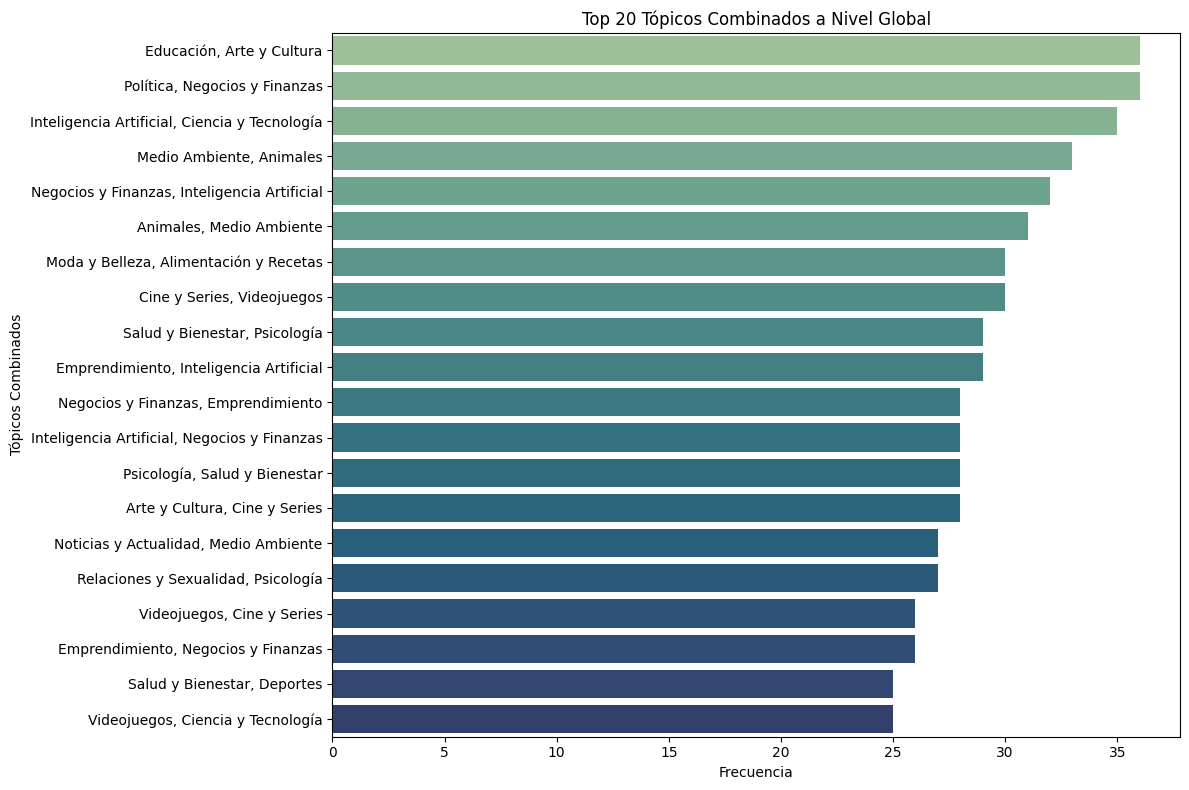


Explicación analítica para Tópicos Combinados a Nivel Global:
Este gráfico de barras muestra la frecuencia de los tópicos combinados más comunes
en todo el dataset, sin segmentar por categorías.
Las barras más largas representan los tópicos que aparecen con mayor frecuencia
en las descripciones de los influencers.
Esto proporciona una visión general de los temas dominantes en la plataforma TikTok
entre los influencers de este dataset TOP 1000.
Por ejemplo, si 'Dance' es el tópico más frecuente, sugiere que el baile es un contenido
muy popular entre los influencers principales.

--- Análisis de Tópicos y Métricas (Engagement Rate Promedio y Followers) ---

Top 10 Tópicos por Engagement Rate Promedio (mínimo 5 influencers):
                               topicos_combinados  avg_engagement_rate  \
37                         Viajes, Moda y Belleza             0.226019   
13                Educación, Ciencia y Tecnología             0.199657   
25   Negocios y Finanzas, Inteligencia Artifi

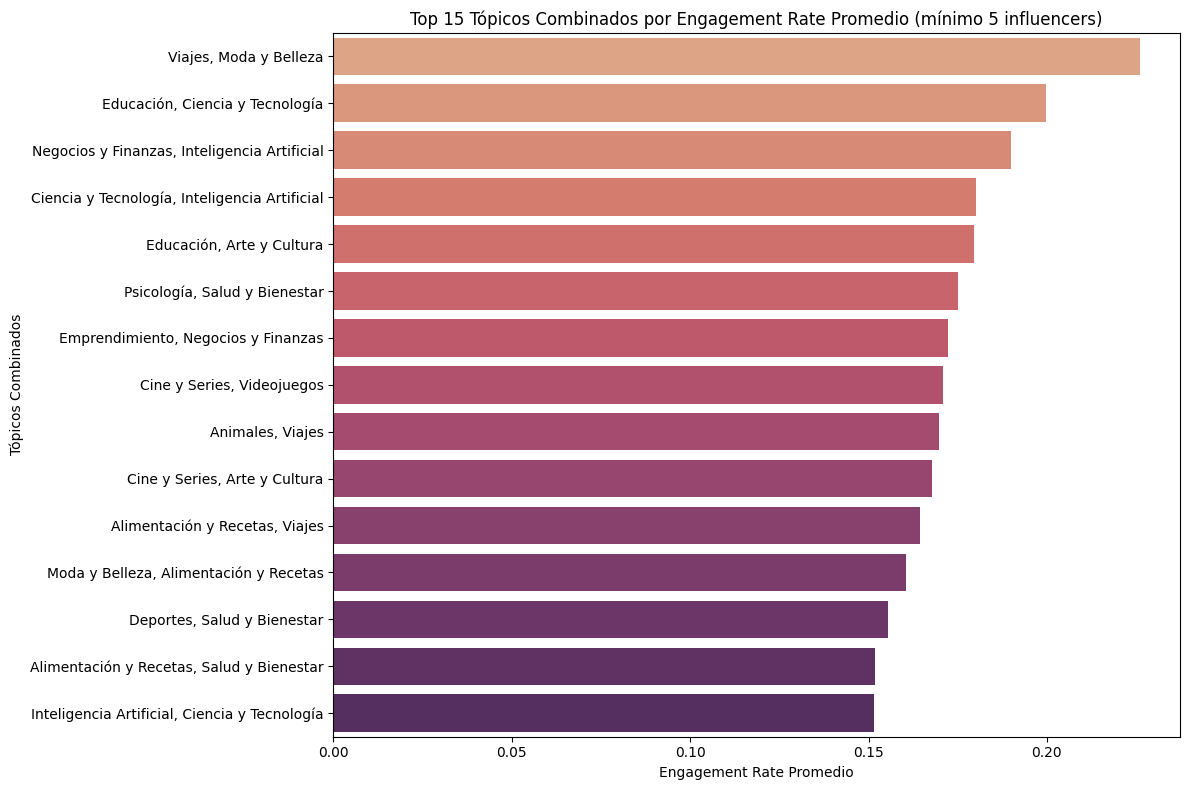


Explicación analítica para Tópicos vs. Engagement Rate Promedio:
Este gráfico muestra los tópicos combinados asociados con los mayores engagement rates promedio.
Sugiere qué temas tienden a generar más interacción (likes, comentarios) entre la audiencia.
Un tópico con un alto engagement rate promedio indica que el contenido relacionado
es probablemente muy atractivo para los espectadores.
Es importante considerar también el 'count' (número de influencers con ese tópico)
para entender si el alto engagement es representativo de muchos influencers o solo de unos pocos.


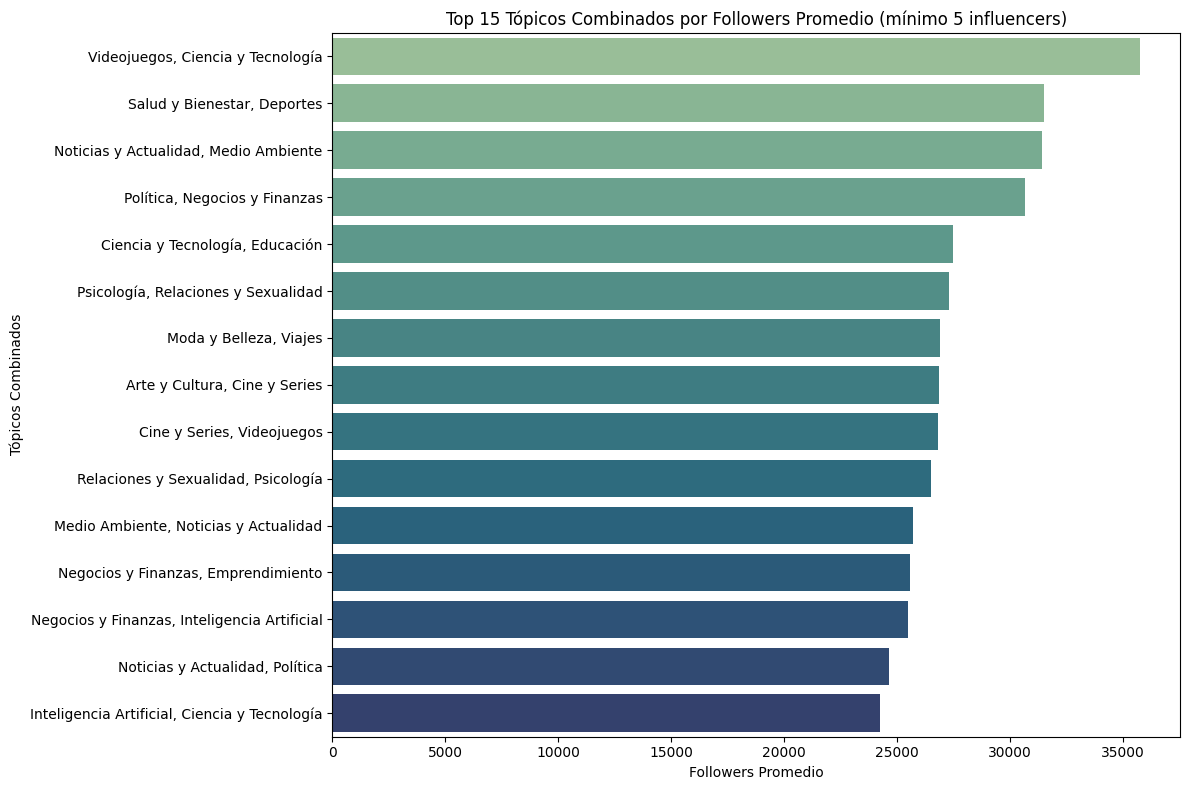


Explicación analítica para Tópicos vs. Followers Promedio:
Este gráfico muestra los tópicos combinados asociados con la mayor cantidad de followers promedio.
Sugiere qué temas son populares entre los influencers que han logrado construir grandes audiencias.
Un alto promedio de followers para un tópico indica que este tema puede ser escalable
en términos de crecimiento de audiencia.
Comparar este gráfico con el de engagement rate puede revelar si los tópicos que atraen
grandes audiencias también generan alta interacción.


In [12]:
# prompt: Dame un análisis EDA del df para poder explorar los datos, el objetivo es detectar el influencer con el topico más relevante (combina los topicos 1 y 2) por influencer_category, geografia, rango_edad_prioritario, porcentaje_mujeres, porcentaje_hombres y Rango de precio. Que sean graficos exploratorios por cada uno según la data y añade una explicacion analítica.

# Combinar 'tópico 1' y 'tópico 2' en una nueva columna 'topicos_combinados'
# Aseguramos que sean strings antes de combinar
df['topicos_combinados'] = df['tópico 1'].astype(str) + ', ' + df['tópico 2'].astype(str)

# Limpiar la columna combinada para eliminar ', nan' o 'nan,' si quedaron de los NaN
df['topicos_combinados'] = df['topicos_combinados'].str.replace(', nan', '').str.replace('nan, ', '').str.strip(', ')
# Reemplazar 'nan, nan' o 'nan' completo si ambos eran NaN
df['topicos_combinados'] = df['topicos_combinados'].replace('nan', 'Sin tópico definido')
df['topicos_combinados'] = df['topicos_combinados'].replace('', 'Sin tópico definido')


print("\nPrimeros 5 registros con la columna 'topicos_combinados':")
print(df[['tópico 1', 'tópico 2', 'topicos_combinados']].head())


# Función para obtener los tópicos más relevantes por una variable categórica
def plot_top_topics_by_category(df, category_col, num_top_topics=10):
    """
    Genera gráficos y análisis de los tópicos combinados más relevantes
    por una columna categórica dada.
    """
    print(f"\n--- Análisis de Tópicos Relevantes por {category_col} ---")

    # Contar la frecuencia de cada tópico combinado dentro de cada categoría
    topic_category_counts = df.groupby(category_col)['topicos_combinados'].value_counts().reset_index(name='count')

    # Para cada categoría, encontrar los top N tópicos
    top_topics_by_category = topic_category_counts.groupby(category_col).apply(
        lambda x: x.nlargest(num_top_topics, 'count')
    ).reset_index(drop=True)

    # Filtrar categorías con suficientes datos (opcional)
    # min_instances = 50 # Puedes ajustar este umbral
    # categories_to_plot = top_topics_by_category[category_col].value_counts()
    # categories_to_plot = categories_to_plot[categories_to_plot >= min_instances].index.tolist()
    # top_topics_by_category = top_topics_by_category[top_topics_by_category[category_col].isin(categories_to_plot)]


    if top_topics_by_category.empty:
        print(f"No hay suficientes datos para visualizar los tópicos por {category_col}.")
        return

    # Visualización usando Plotly para interactividad
    print(f"Generando gráfico para Tópicos Relevantes por {category_col}...")

    fig = px.bar(top_topics_by_category,
                 x='count',
                 y='topicos_combinados',
                 color=category_col,
                 title=f'Top {num_top_topics} Tópicos Combinados por {category_col}',
                 labels={'count': 'Frecuencia', 'topicos_combinados': 'Tópicos Combinados'},
                 orientation='h') # Gráfico de barras horizontal

    fig.update_layout(yaxis={'categoryorder':'total ascending'}) # Ordenar barras por frecuencia
    fig.show()

    print(f"\nExplicación analítica para Tópicos Relevantes por {category_col}:")
    print(f"Este gráfico de barras muestra la frecuencia de los {num_top_topics} tópicos combinados más comunes")
    print(f"dentro de cada '{category_col}'.")
    print("Cada barra representa un tópico combinado, segmentado por el color de la categoría.")
    print("Las barras más largas indican tópicos más frecuentes dentro de esa categoría.")
    print("Esto nos ayuda a identificar qué temas son más populares o relevantes para los influencers")
    print(f"asociados con cada '{category_col}'.")
    print(f"Por ejemplo, podemos ver qué tópicos dominan en la categoría '{top_topics_by_category[category_col].iloc[0]}',")
    print("o qué tópicos son comunes en varias geografías.")
    print("Observa las categorías con mayor concentración en ciertos tópicos para entender su enfoque principal.")


# Aplicar la función a las columnas de interés
plot_top_topics_by_category(df, 'influencer_category', num_top_topics=10)
plot_top_topics_by_category(df, 'geografia', num_top_topics=10)
plot_top_topics_by_category(df, 'rango_edad_prioritario', num_top_topics=10)

# Para porcentaje_mujeres y porcentaje_hombres, necesitamos categorizarlos primero
# dado que son numéricos. Creamos rangos para ellos.
bins_gender = [0, 25, 50, 75, 100]
labels_gender = ['0-25%', '26-50%', '51-75%', '76-100%']

if 'porcentaje_mujeres' in df.columns:
    df['rango_porcentaje_mujeres'] = pd.cut(df['porcentaje_mujeres'], bins=bins_gender, labels=labels_gender, right=True, include_lowest=True)
    plot_top_topics_by_category(df, 'rango_porcentaje_mujeres', num_top_topics=10)
else:
    print("\nColumna 'porcentaje_mujeres' no encontrada para análisis.")

if 'porcentaje_hombres' in df.columns:
    df['rango_porcentaje_hombres'] = pd.cut(df['porcentaje_hombres'], bins=bins_gender, labels=labels_gender, right=True, include_lowest=True)
    plot_top_topics_by_category(df, 'rango_porcentaje_hombres', num_top_topics=10)
else:
     print("\nColumna 'porcentaje_hombres' no encontrada para análisis.")


plot_top_topics_by_category(df, 'Rango de precio', num_top_topics=10)


# Análisis adicional: Frecuencia global de los tópicos combinados
print("\n--- Frecuencia Global de Tópicos Combinados ---")
global_topic_counts = df['topicos_combinados'].value_counts().reset_index()
global_topic_counts.columns = ['topicos_combinados', 'count']

# Mostrar los top N tópicos globales
num_top_global = 20 # Puedes ajustar
print(f"Top {num_top_global} Tópicos Combinados a nivel global:")
print(global_topic_counts.head(num_top_global))

# Visualizar los tópicos globales más frecuentes
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='topicos_combinados', data=global_topic_counts.head(num_top_global), palette='crest')
plt.title(f'Top {num_top_global} Tópicos Combinados a Nivel Global')
plt.xlabel('Frecuencia')
plt.ylabel('Tópicos Combinados')
plt.tight_layout()
plt.show()

print("\nExplicación analítica para Tópicos Combinados a Nivel Global:")
print("Este gráfico de barras muestra la frecuencia de los tópicos combinados más comunes")
print("en todo el dataset, sin segmentar por categorías.")
print("Las barras más largas representan los tópicos que aparecen con mayor frecuencia")
print("en las descripciones de los influencers.")
print("Esto proporciona una visión general de los temas dominantes en la plataforma TikTok")
print("entre los influencers de este dataset TOP 1000.")
print("Por ejemplo, si 'Dance' es el tópico más frecuente, sugiere que el baile es un contenido")
print("muy popular entre los influencers principales.")


# Análisis de la relación entre tópicos y métricas de engagement/followers
print("\n--- Análisis de Tópicos y Métricas (Engagement Rate Promedio y Followers) ---")

# Agrupar por tópicos combinados y calcular métricas promedio
topic_metrics = df.groupby('topicos_combinados').agg(
    avg_engagement_rate=('awg_engagement_rate', 'mean'),
    avg_followers=('followers', 'mean'),
    count=('influencer_category', 'count') # Contar cuántos influencers tienen ese tópico
).reset_index()

# Filtrar tópicos con pocas instancias para evitar promedios inestables (opcional)
min_influencers_per_topic = 5 # Ajustar umbral
topic_metrics_filtered = topic_metrics[topic_metrics['count'] >= min_influencers_per_topic].sort_values(by='avg_engagement_rate', ascending=False)

print(f"\nTop 10 Tópicos por Engagement Rate Promedio (mínimo {min_influencers_per_topic} influencers):")
print(topic_metrics_filtered.head(10))

print(f"\nTop 10 Tópicos por Followers Promedio (mínimo {min_influencers_per_topic} influencers):")
print(topic_metrics_filtered.sort_values(by='avg_followers', ascending=False).head(10))

# Visualización: Tópicos y Engagement Rate Promedio
if not topic_metrics_filtered.empty:
    plt.figure(figsize=(12, 8))
    sns.barplot(x='avg_engagement_rate', y='topicos_combinados', data=topic_metrics_filtered.head(15), palette='flare')
    plt.title(f'Top 15 Tópicos Combinados por Engagement Rate Promedio (mínimo {min_influencers_per_topic} influencers)')
    plt.xlabel('Engagement Rate Promedio')
    plt.ylabel('Tópicos Combinados')
    plt.tight_layout()
    plt.show()

    print("\nExplicación analítica para Tópicos vs. Engagement Rate Promedio:")
    print("Este gráfico muestra los tópicos combinados asociados con los mayores engagement rates promedio.")
    print("Sugiere qué temas tienden a generar más interacción (likes, comentarios) entre la audiencia.")
    print("Un tópico con un alto engagement rate promedio indica que el contenido relacionado")
    print("es probablemente muy atractivo para los espectadores.")
    print("Es importante considerar también el 'count' (número de influencers con ese tópico)")
    print("para entender si el alto engagement es representativo de muchos influencers o solo de unos pocos.")


    # Visualización: Tópicos y Followers Promedio
    plt.figure(figsize=(12, 8))
    sns.barplot(x='avg_followers', y='topicos_combinados', data=topic_metrics_filtered.sort_values(by='avg_followers', ascending=False).head(15), palette='crest')
    plt.title(f'Top 15 Tópicos Combinados por Followers Promedio (mínimo {min_influencers_per_topic} influencers)')
    plt.xlabel('Followers Promedio')
    plt.ylabel('Tópicos Combinados')
    plt.tight_layout()
    plt.show()

    print("\nExplicación analítica para Tópicos vs. Followers Promedio:")
    print("Este gráfico muestra los tópicos combinados asociados con la mayor cantidad de followers promedio.")
    print("Sugiere qué temas son populares entre los influencers que han logrado construir grandes audiencias.")
    print("Un alto promedio de followers para un tópico indica que este tema puede ser escalable")
    print("en términos de crecimiento de audiencia.")
    print("Comparar este gráfico con el de engagement rate puede revelar si los tópicos que atraen")
    print("grandes audiencias también generan alta interacción.")

else:
    print("\nNo hay suficientes tópicos para realizar el análisis de métricas.")



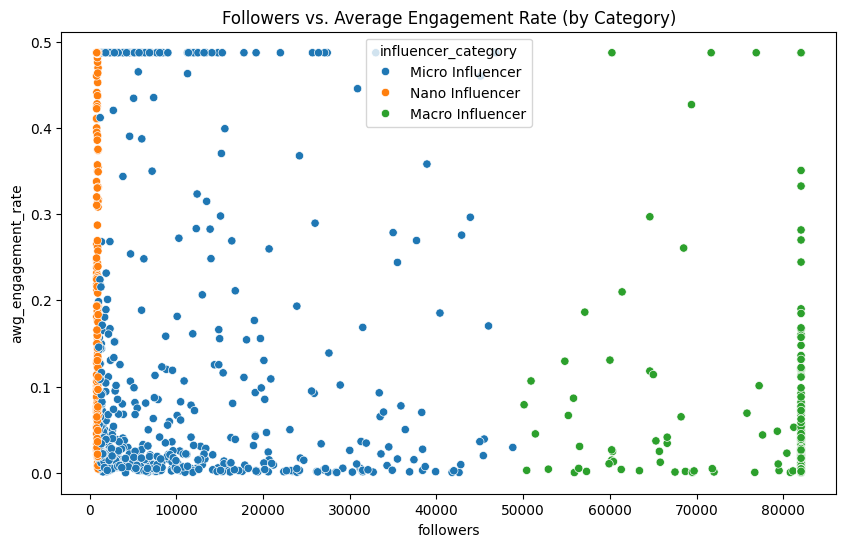

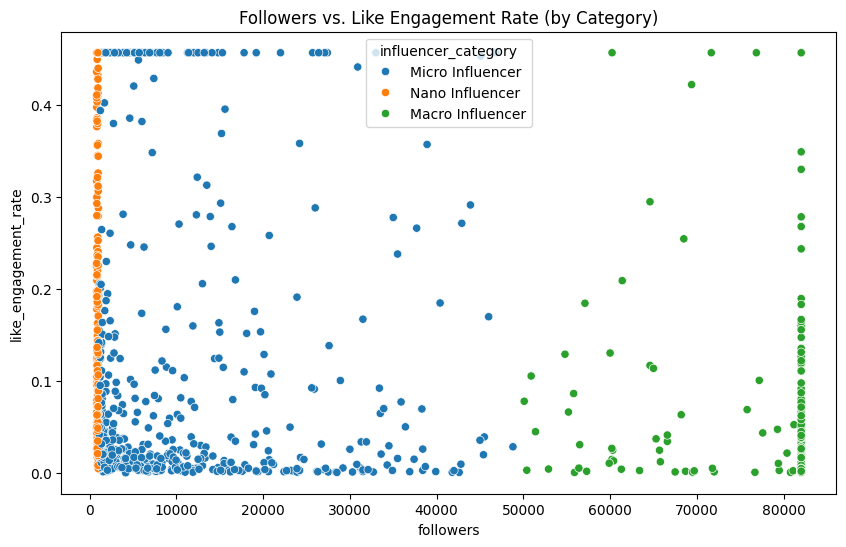

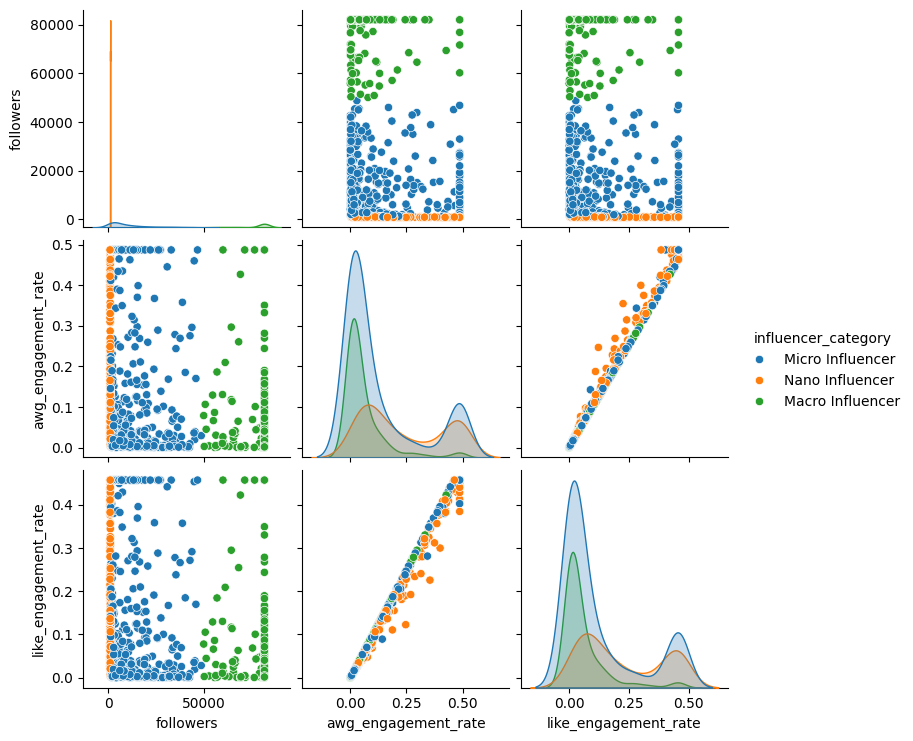


Matriz de Correlación de las Métricas Clave:
                         followers  following     likes  awg_engagement_rate  \
followers                 1.000000  -0.103064  0.200739            -0.281872   
following                -0.103064   1.000000 -0.039398            -0.232446   
likes                     0.200739  -0.039398  1.000000            -0.064444   
awg_engagement_rate      -0.281872  -0.232446 -0.064444             1.000000   
comment_engagement_rate  -0.111264  -0.097659 -0.024017             0.398002   
like_engagement_rate     -0.272987  -0.231955 -0.063590             0.998304   

                         comment_engagement_rate  like_engagement_rate  
followers                              -0.111264             -0.272987  
following                              -0.097659             -0.231955  
likes                                  -0.024017             -0.063590  
awg_engagement_rate                     0.398002              0.998304  
comment_engagement_rate     

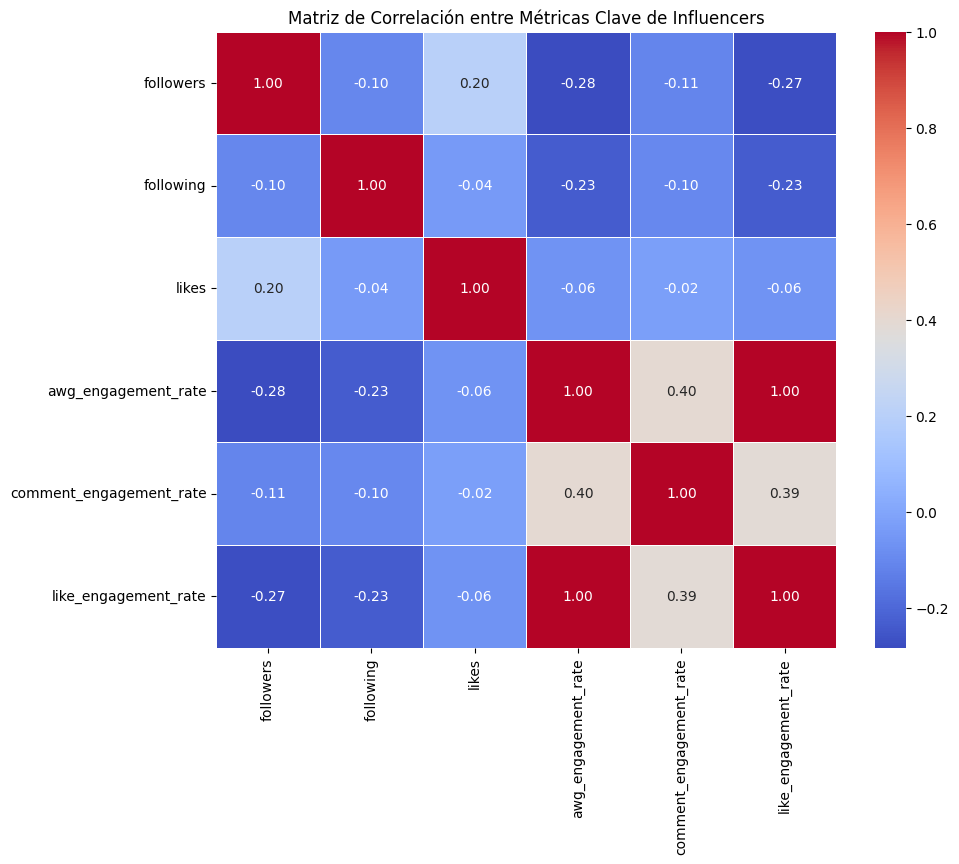


--- Explicación Analítica de la Matriz de Correlación ---
La matriz de correlación y el mapa de calor asociado muestran la fuerza y dirección de la relación lineal
entre pares de variables numéricas seleccionadas.
Los valores varían de -1 a 1:
  - Un valor cercano a 1 indica una correlación positiva fuerte (cuando una variable aumenta, la otra también).
  - Un valor cercano a -1 indica una correlación negativa fuerte (cuando una variable aumenta, la otra disminuye).
  - Un valor cercano a 0 indica poca o ninguna correlación lineal.

Análisis de Correlaciones Clave:
- Followers vs. Likes (0.20):
  Era de esperar una correlación positiva muy fuerte. Los influencers con más seguidores
  tienden a recibir más 'likes' en sus videos, lo cual es lógico ya que tienen una audiencia mayor.
  Un valor alto y positivo (>0.8 o >0.9) confirma esta relación directa y esperada.
- Followers vs. Average Engagement Rate (-0.28):
  Esta correlación es particularmente interesante. A menudo, un número muy 

In [13]:
# prompt: Dame una matriz de correlacion de los datos mas relevantes para este analisis exploratorio, y una explicación analitica de cada uno.
import matplotlib.pyplot as plt
import seaborn as sns

 # 1. Prepare the data
 # Select relevant columns
relevant_cols = ['influencer_category', 'followers', 'awg_engagement_rate', 'like_engagement_rate']
analysis_df = df[relevant_cols].copy()  # Create a copy to avoid modifying the original

 # Convert 'followers' to numeric, handling errors (replace non-numeric with NaN)
analysis_df['followers'] = pd.to_numeric(analysis_df['followers'], errors='coerce')

 # 4. Scatter Plots to visualize relationships between numerical features grouped by category
plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='awg_engagement_rate', hue='influencer_category', data=analysis_df)
plt.title('Followers vs. Average Engagement Rate (by Category)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='like_engagement_rate', hue='influencer_category', data=analysis_df)
plt.title('Followers vs. Like Engagement Rate (by Category)')
plt.show()

 #Further analysis using pairplot
sns.pairplot(analysis_df, hue="influencer_category")
plt.show()

# Seleccionar las columnas numéricas relevantes para el análisis de correlación
# Incluimos followers, following, likes, y las tasas de engagement
relevant_numeric_cols = ['followers', 'following', 'likes',
                           'awg_engagement_rate', 'comment_engagement_rate',
                           'like_engagement_rate']

# Asegurarse de que las columnas existan en el DataFrame
relevant_numeric_cols = [col for col in relevant_numeric_cols if col in df.columns]

# Crear el sub-DataFrame solo con las columnas relevantes
df_corr = df[relevant_numeric_cols].copy()

# Calcular la matriz de correlación
correlation_matrix = df_corr.corr()

print("\nMatriz de Correlación de las Métricas Clave:")
print(correlation_matrix)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación entre Métricas Clave de Influencers')
plt.show()

print("\n--- Explicación Analítica de la Matriz de Correlación ---")
print("La matriz de correlación y el mapa de calor asociado muestran la fuerza y dirección de la relación lineal")
print("entre pares de variables numéricas seleccionadas.")
print("Los valores varían de -1 a 1:")
print("  - Un valor cercano a 1 indica una correlación positiva fuerte (cuando una variable aumenta, la otra también).")
print("  - Un valor cercano a -1 indica una correlación negativa fuerte (cuando una variable aumenta, la otra disminuye).")
print("  - Un valor cercano a 0 indica poca o ninguna correlación lineal.")

print("\nAnálisis de Correlaciones Clave:")

if 'followers' in df_corr.columns and 'likes' in df_corr.columns:
    corr_followers_likes = correlation_matrix.loc['followers', 'likes']
    print(f"- Followers vs. Likes ({corr_followers_likes:.2f}):")
    print("  Era de esperar una correlación positiva muy fuerte. Los influencers con más seguidores")
    print("  tienden a recibir más 'likes' en sus videos, lo cual es lógico ya que tienen una audiencia mayor.")
    print("  Un valor alto y positivo (>0.8 o >0.9) confirma esta relación directa y esperada.")

if 'followers' in df_corr.columns and 'awg_engagement_rate' in df_corr.columns:
    corr_followers_engagement = correlation_matrix.loc['followers', 'awg_engagement_rate']
    print(f"- Followers vs. Average Engagement Rate ({corr_followers_engagement:.2f}):")
    print("  Esta correlación es particularmente interesante. A menudo, un número muy alto de seguidores")
    print("  puede correlacionar negativamente o débilmente con las tasas de engagement (el 'law of diminishing returns').")
    print("  Si el valor es cercano a 0 o ligeramente negativo, sugiere que tener más seguidores no garantiza")
    print("  un engagement proporcionalmente alto. Un valor positivo, aunque sea bajo, indicaría que hay una")
    print("  tendencia a mantener algo de engagement a medida que crecen, pero probablemente menos eficiente que con audiencias más pequeñas.")

if 'like_engagement_rate' in df_corr.columns and 'comment_engagement_rate' in df_corr.columns:
    corr_like_comment = correlation_matrix.loc['like_engagement_rate', 'comment_engagement_rate']
    print(f"- Like Engagement Rate vs. Comment Engagement Rate ({corr_like_comment:.2f}):")
    print("  Se esperaría una correlación positiva fuerte aquí. Los videos que generan muchos likes")
    print("  también tienden a generar más comentarios, ya que ambas son formas de interacción de la audiencia.")
    print("  Un valor positivo alto (cercano a 0.8 o 0.9) confirmaría que estos dos tipos de engagement suelen ir de la mano.")

if 'awg_engagement_rate' in df_corr.columns and 'like_engagement_rate' in df_corr.columns:
     corr_avg_like = correlation_matrix.loc['awg_engagement_rate', 'like_engagement_rate']
     print(f"- Average Engagement Rate vs. Like Engagement Rate ({corr_avg_like:.2f}):")
     print("  Debería haber una correlación positiva muy fuerte, ya que el 'Like Engagement Rate' es un componente importante")
     print("  y a menudo dominante del 'Average Engagement Rate'.")
     print("  Un valor muy cercano a 1 confirmaría que la tasa de likes es el principal impulsor de la tasa de engagement promedio.")

# Añadir análisis para 'following' si es relevante (a menudo no está fuertemente correlacionado con métricas de audiencia/engagement)
if 'followers' in df_corr.columns and 'following' in df_corr.columns:
    corr_followers_following = correlation_matrix.loc['followers', 'following']
    print(f"- Followers vs. Following ({corr_followers_following:.2f}):")
    print("  Generalmente, la cantidad de personas a las que sigue un influencer ('following') no tiene una correlación")
    print("  fuerte y directa con la cantidad de seguidores que tiene ('followers').")
    print("  Un valor cercano a 0 confirmaría que estas métricas son relativamente independientes.")

print("\nInterpretación General:")
print("La matriz nos ayuda a entender las relaciones entre el tamaño de la audiencia y las métricas de interacción.")
print("Identifica qué métricas se mueven juntas y cuáles son más independientes.")
print("Por ejemplo, si 'followers' tiene una correlación positiva fuerte con 'likes' pero débil/negativa con las tasas de engagement,")
print("sugiere que aunque los influencers grandes obtienen muchos likes en términos absolutos, su audiencia es menos interactiva")
print("en proporción a su tamaño.")
print("Este análisis es fundamental para entender la dinámica de crecimiento y engagement en la plataforma.")



--- Análisis Univariado ---

Distribución de influencers por categoría:
influencer_category
Micro Influencer    53.7
Nano Influencer     24.7
Macro Influencer    21.6
Name: proportion, dtype: float64

Distribución de tópicos combinados (Top 20 global):
topicos_combinados
Educación, Arte y Cultura                        3.6
Política, Negocios y Finanzas                    3.6
Inteligencia Artificial, Ciencia y Tecnología    3.5
Medio Ambiente, Animales                         3.3
Negocios y Finanzas, Inteligencia Artificial     3.2
Animales, Medio Ambiente                         3.1
Moda y Belleza, Alimentación y Recetas           3.0
Cine y Series, Videojuegos                       3.0
Salud y Bienestar, Psicología                    2.9
Emprendimiento, Inteligencia Artificial          2.9
Negocios y Finanzas, Emprendimiento              2.8
Inteligencia Artificial, Negocios y Finanzas     2.8
Psicología, Salud y Bienestar                    2.8
Arte y Cultura, Cine y Series         

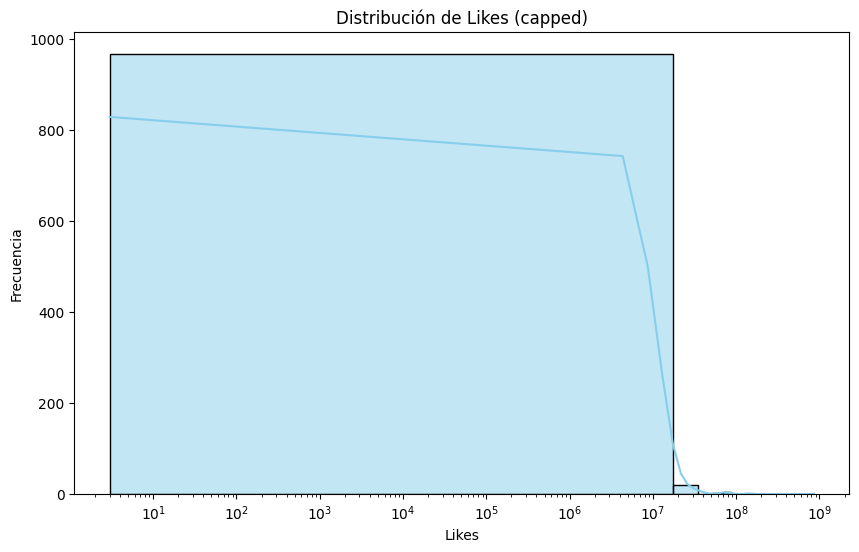


Estadísticas descriptivas de 'comment_engagement_rate':
count    1000.000000
mean        0.018624
std         0.080693
min         0.000000
25%         0.000252
50%         0.001203
75%         0.006157
max         1.000000
Name: comment_engagement_rate, dtype: float64


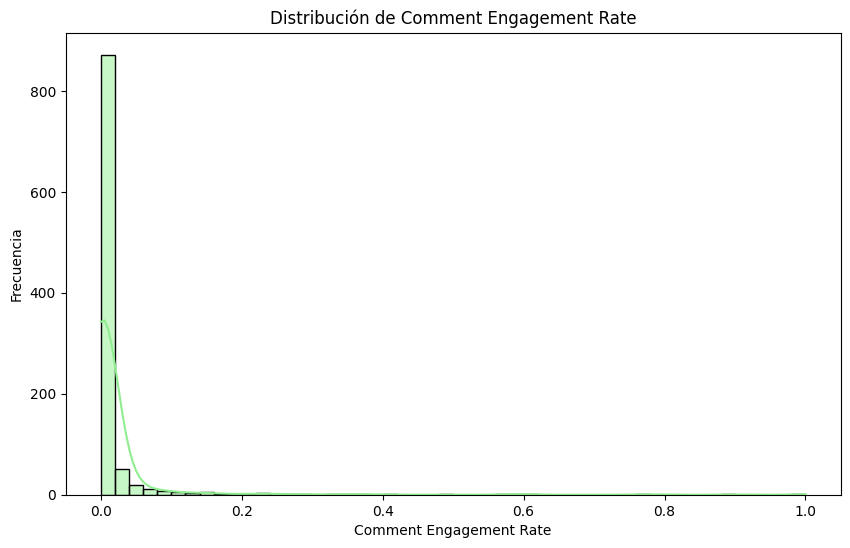


--- Explicación Analítica del Análisis Univariado ---
El análisis univariado nos da una primera idea de la composición del dataset y las características individuales de las métricas.
La distribución de 'influencer_category' muestra la proporción de influencers en cada rango de tamaño.
La distribución de 'topicos_combinados' revela los temas más prevalentes en el dataset globalmente.
La distribución de 'likes' (y 'comment_engagement_rate' como proxy para comentarios) indica la dispersión
y tendencia central de la interacción que reciben los influencers. La visualización nos ayuda a identificar si
estas métricas siguen una distribución normal o si están sesgadas (por ejemplo, muchos influencers con menos likes/comments y pocos con muchos).
Estas distribuciones base son cruciales para interpretar los análisis bivariados y multivariados posteriores.

--- Análisis Bivariado ---


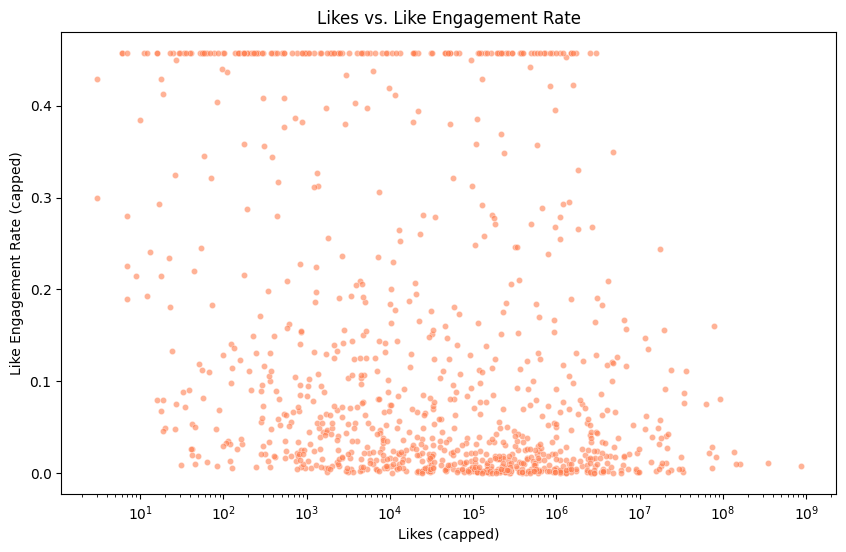


Análisis: Likes vs. Like Engagement Rate
El gráfico de dispersión muestra la relación entre el número de likes y la tasa de engagement de likes.
Una nube de puntos dispersa pero con una tendencia (por ejemplo, una ligera caída a medida que aumentan los likes
en escala logarítmica para la tasa de engagement) sugiere cómo la eficiencia del engagement (tasa)
se comporta a medida que aumenta el volumen absoluto de likes (y, por ende, el tamaño de la audiencia).
Aunque hay una correlación positiva esperada entre 'followers' y 'likes' absolutos,
la tasa de engagement ('like_engagement_rate') a menudo puede disminuir a medida que crece el número de seguidores y likes absolutos,
reflejando que las audiencias más grandes pueden ser menos segmentadas o activas en promedio.


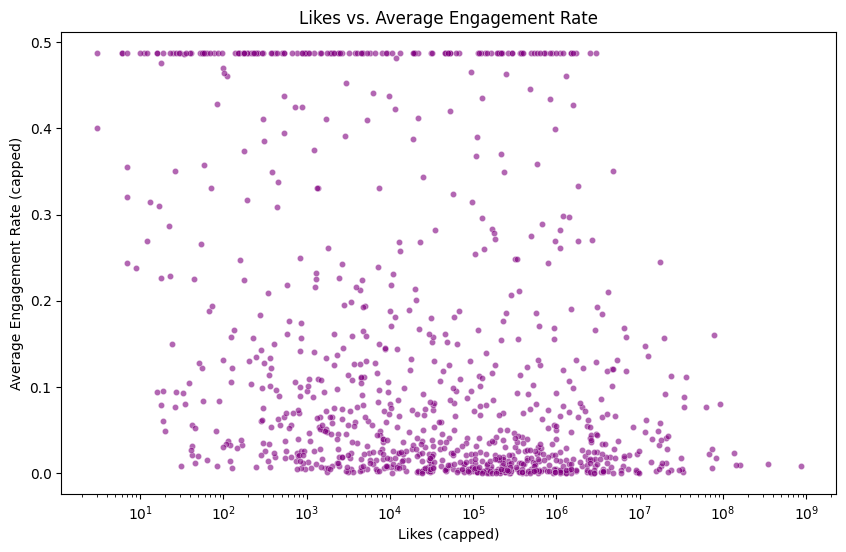


Análisis: Likes vs. Average Engagement Rate
Similar al anterior, este gráfico explora la relación entre los likes absolutos y la tasa de engagement promedio.
Como el like engagement rate es un componente principal del promedio, se espera una relación similar.
Ambos gráficos reafirman la correlación lineal (o la falta de ella) que vimos en la matriz de correlación.


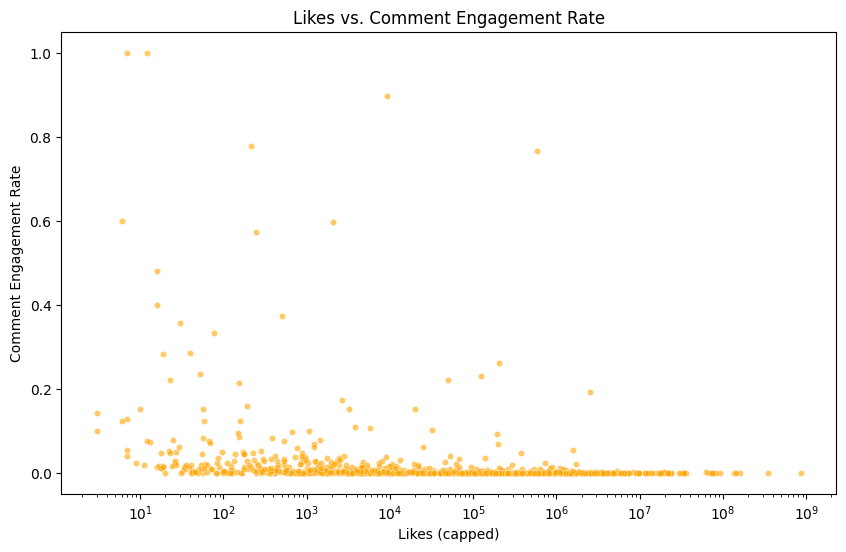


Análisis: Likes vs. Comment Engagement Rate
Este gráfico examina si el número absoluto de likes se relaciona con la tasa de comentarios.
Una relación positiva sugeriría que videos muy likeds también tienden a estimular comentarios.
Sin embargo, la tasa de comentarios es generalmente más baja que la tasa de likes, y su relación puede ser menos directa,
dependiendo del tipo de contenido y la audiencia. Un contenido que invita a la discusión (más comentarios)
no siempre es el mismo que maximiza los likes.

--- Análisis: Likes por topicos_combinados ---
Demasiadas categorías (40) en 'topicos_combinados' para un box plot efectivo. Usando bar plot con promedio.


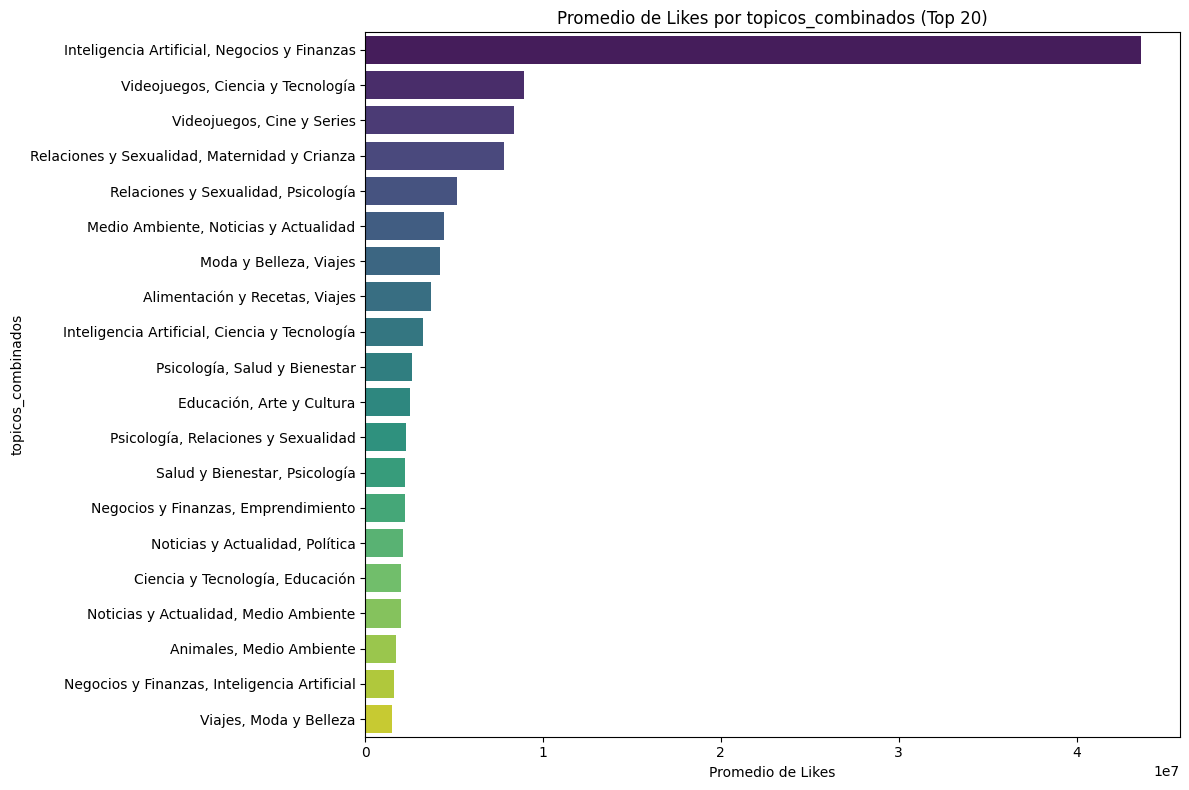


Explicación analítica: Likes por topicos_combinados
Estos gráficos (Box Plot o Bar Plot) visualizan cómo varía la métrica 'Likes'
entre las diferentes categorías de 'topicos_combinados'.
El Bar Plot muestra el promedio de 'Likes' para las Top 20 categorías de 'topicos_combinados'.
Las barras más largas indican categorías con un promedio más alto de la métrica.
Esto ayuda a identificar rápidamente qué categorías están asociadas con valores más altos o más bajos de la métrica de interés.
Por ejemplo, si analizamos 'Likes' por 'Geografia', podemos ver si los influencers en ciertas regiones tienden a recibir significativamente más o menos likes.
Si analizamos 'Like Engagement Rate' por 'topicos_combinados', podemos identificar qué temas generan tasas de interacción por like más altas.

--- Análisis: Likes por geografia ---


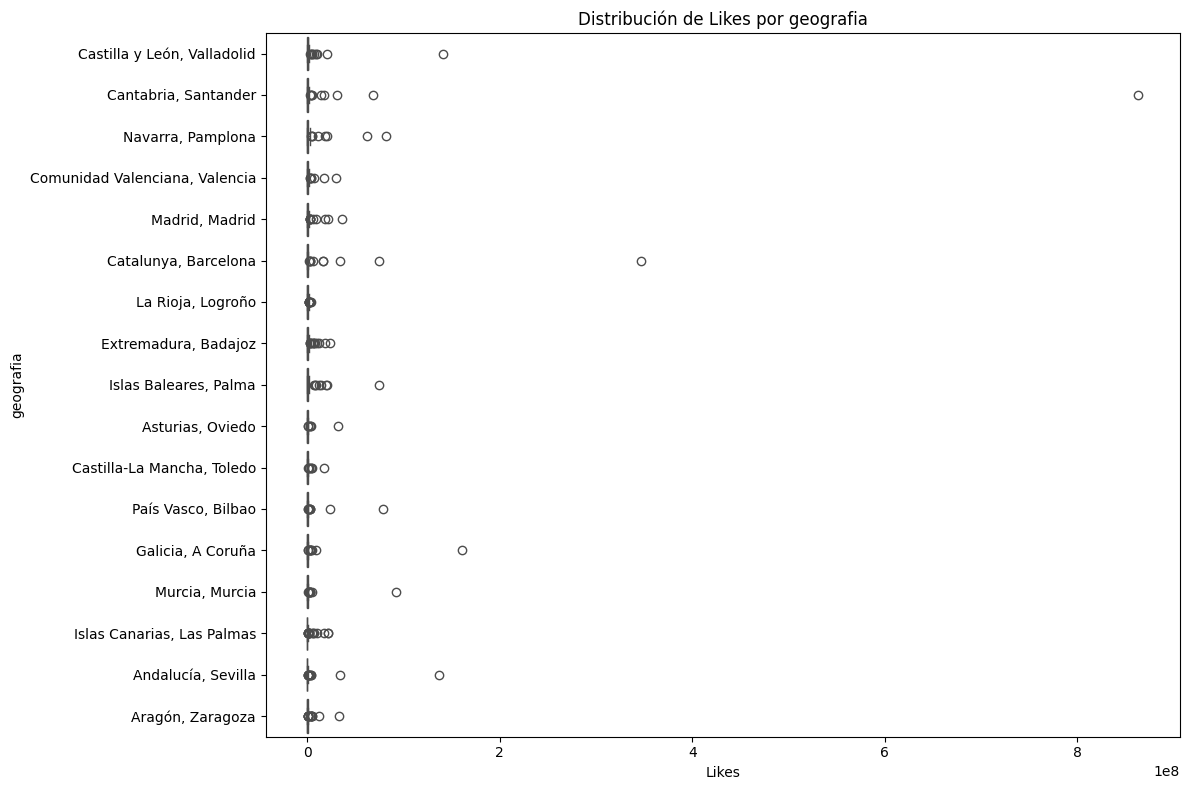


Explicación analítica: Likes por geografia
Estos gráficos (Box Plot o Bar Plot) visualizan cómo varía la métrica 'Likes'
entre las diferentes categorías de 'geografia'.
El Box Plot muestra la mediana (línea central), los cuartiles (caja) y la dispersión (bigotes) de la métrica para cada categoría.
Observa la posición de la mediana y el tamaño de la caja para comparar el valor típico y la variabilidad entre categorías.
Los puntos fuera de los bigotes representan posibles outliers dentro de esa categoría.
Por ejemplo, si analizamos 'Likes' por 'Geografia', podemos ver si los influencers en ciertas regiones tienden a recibir significativamente más o menos likes.
Si analizamos 'Like Engagement Rate' por 'topicos_combinados', podemos identificar qué temas generan tasas de interacción por like más altas.

--- Análisis: Likes por rango_edad_prioritario ---


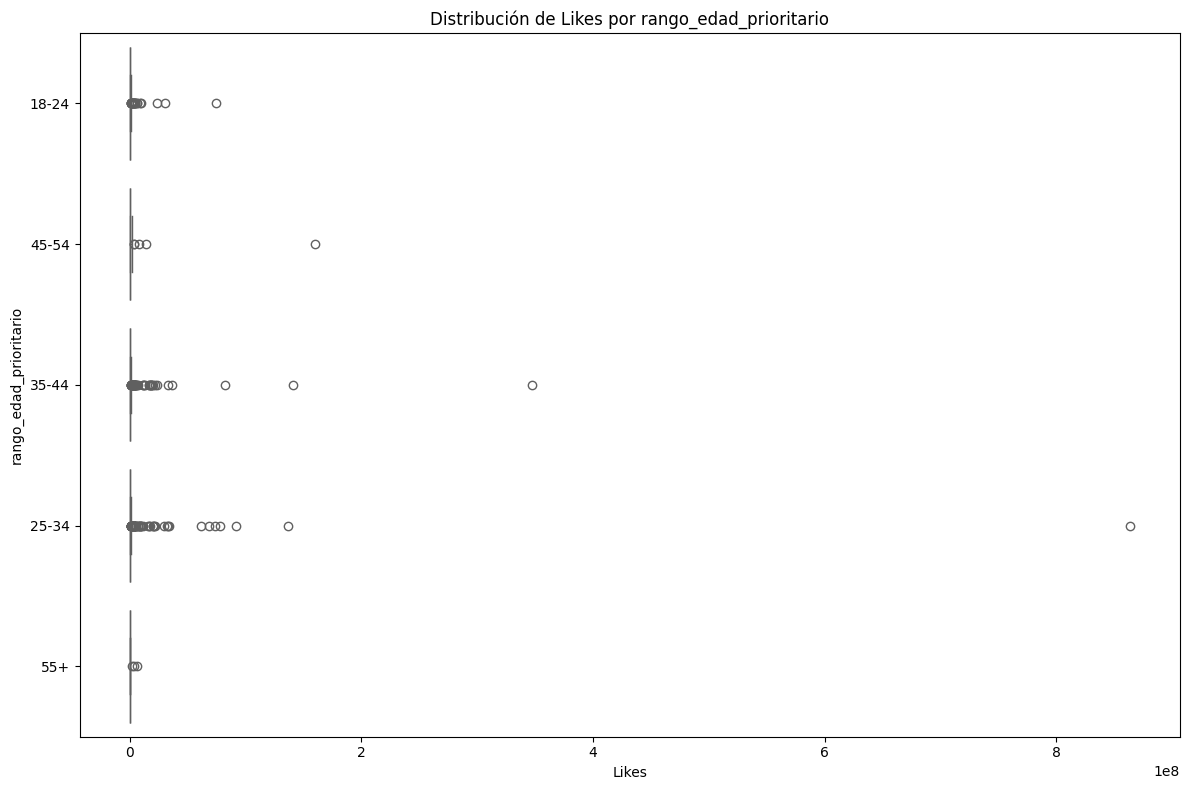


Explicación analítica: Likes por rango_edad_prioritario
Estos gráficos (Box Plot o Bar Plot) visualizan cómo varía la métrica 'Likes'
entre las diferentes categorías de 'rango_edad_prioritario'.
El Box Plot muestra la mediana (línea central), los cuartiles (caja) y la dispersión (bigotes) de la métrica para cada categoría.
Observa la posición de la mediana y el tamaño de la caja para comparar el valor típico y la variabilidad entre categorías.
Los puntos fuera de los bigotes representan posibles outliers dentro de esa categoría.
Por ejemplo, si analizamos 'Likes' por 'Geografia', podemos ver si los influencers en ciertas regiones tienden a recibir significativamente más o menos likes.
Si analizamos 'Like Engagement Rate' por 'topicos_combinados', podemos identificar qué temas generan tasas de interacción por like más altas.

--- Análisis: Likes por rango_porcentaje_mujeres ---


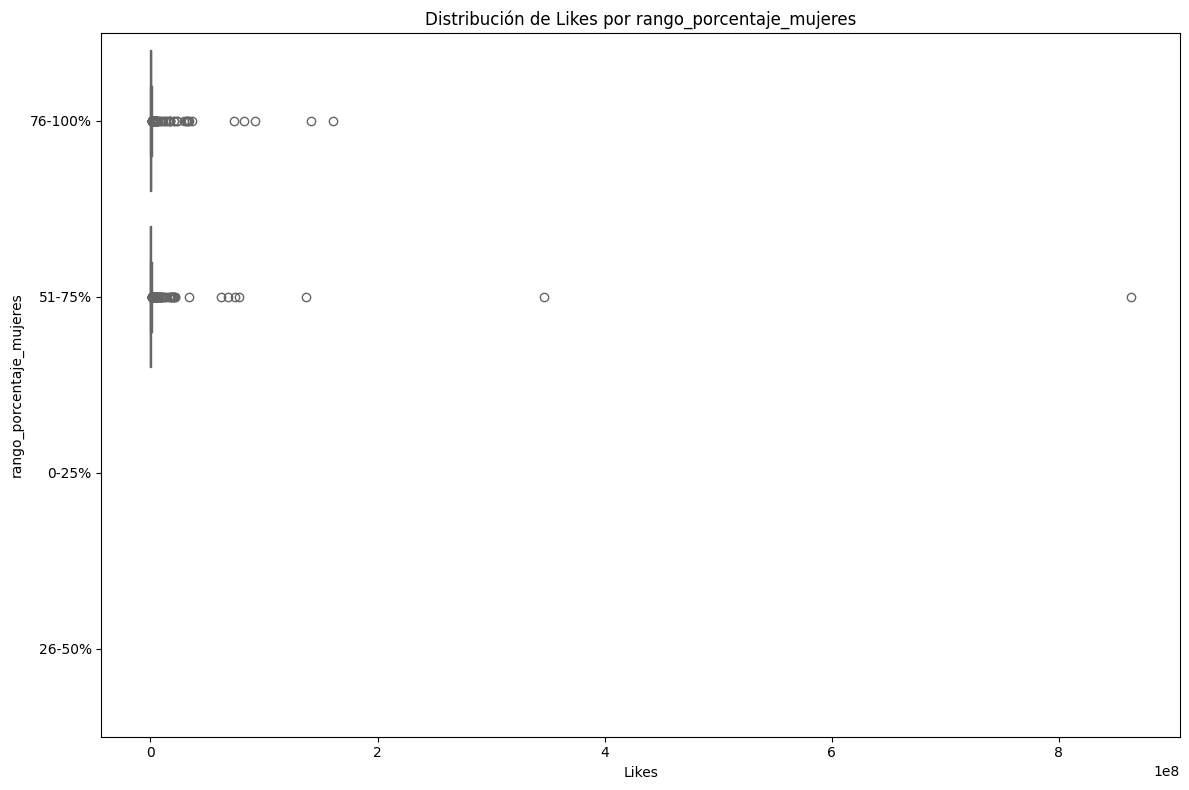


Explicación analítica: Likes por rango_porcentaje_mujeres
Estos gráficos (Box Plot o Bar Plot) visualizan cómo varía la métrica 'Likes'
entre las diferentes categorías de 'rango_porcentaje_mujeres'.
El Box Plot muestra la mediana (línea central), los cuartiles (caja) y la dispersión (bigotes) de la métrica para cada categoría.
Observa la posición de la mediana y el tamaño de la caja para comparar el valor típico y la variabilidad entre categorías.
Los puntos fuera de los bigotes representan posibles outliers dentro de esa categoría.
Por ejemplo, si analizamos 'Likes' por 'Geografia', podemos ver si los influencers en ciertas regiones tienden a recibir significativamente más o menos likes.
Si analizamos 'Like Engagement Rate' por 'topicos_combinados', podemos identificar qué temas generan tasas de interacción por like más altas.

--- Análisis: Likes por rango_porcentaje_hombres ---


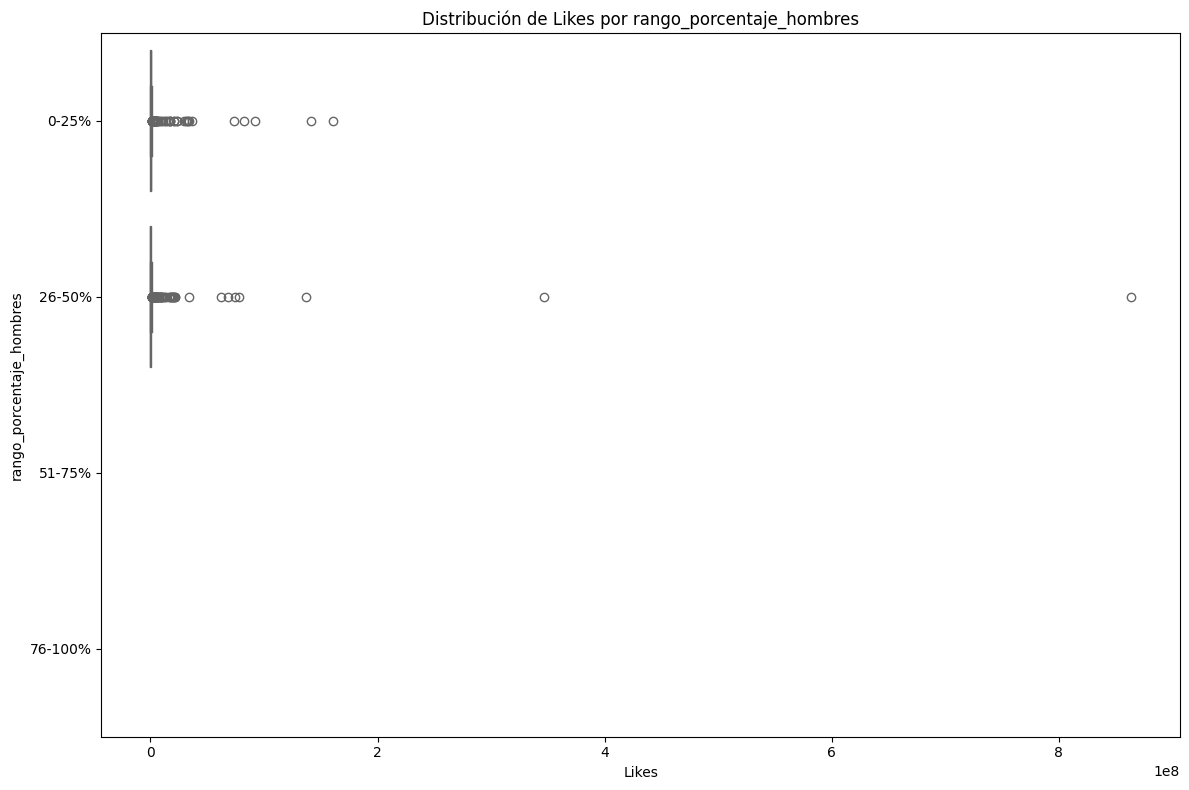


Explicación analítica: Likes por rango_porcentaje_hombres
Estos gráficos (Box Plot o Bar Plot) visualizan cómo varía la métrica 'Likes'
entre las diferentes categorías de 'rango_porcentaje_hombres'.
El Box Plot muestra la mediana (línea central), los cuartiles (caja) y la dispersión (bigotes) de la métrica para cada categoría.
Observa la posición de la mediana y el tamaño de la caja para comparar el valor típico y la variabilidad entre categorías.
Los puntos fuera de los bigotes representan posibles outliers dentro de esa categoría.
Por ejemplo, si analizamos 'Likes' por 'Geografia', podemos ver si los influencers en ciertas regiones tienden a recibir significativamente más o menos likes.
Si analizamos 'Like Engagement Rate' por 'topicos_combinados', podemos identificar qué temas generan tasas de interacción por like más altas.

--- Análisis: Likes por Rango de precio ---


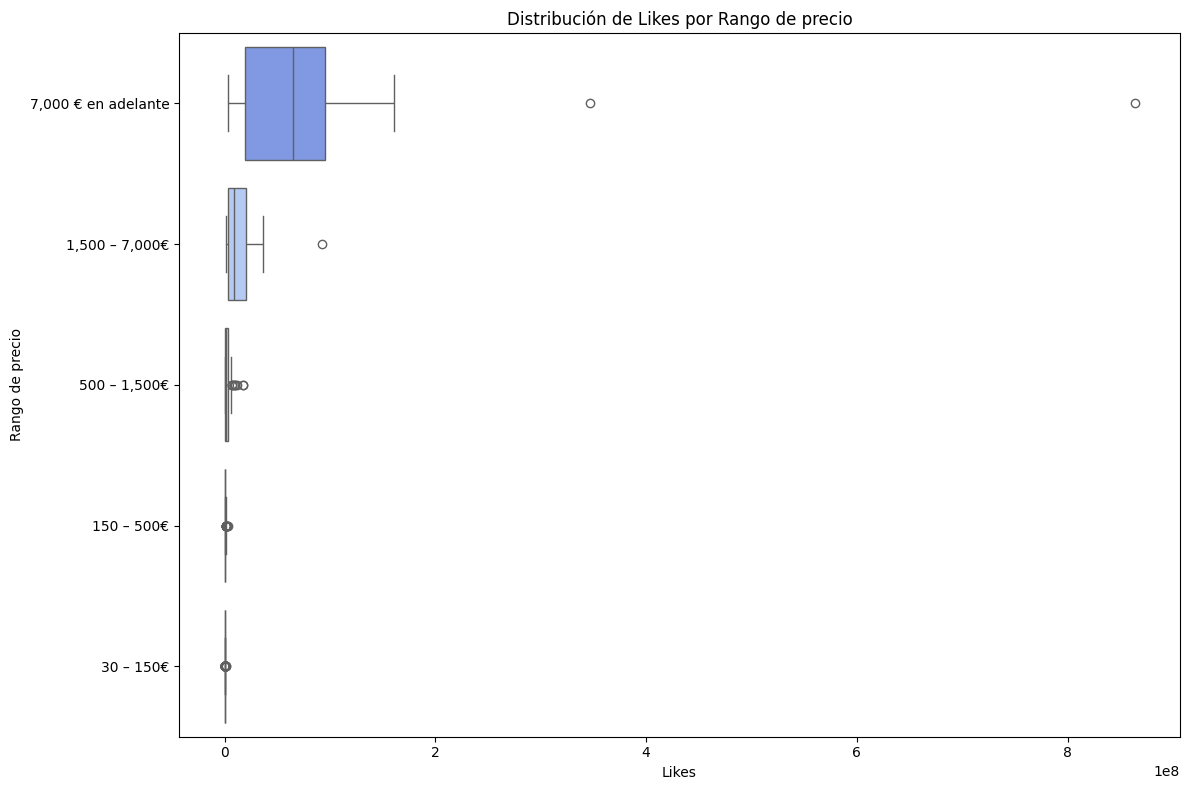


Explicación analítica: Likes por Rango de precio
Estos gráficos (Box Plot o Bar Plot) visualizan cómo varía la métrica 'Likes'
entre las diferentes categorías de 'Rango de precio'.
El Box Plot muestra la mediana (línea central), los cuartiles (caja) y la dispersión (bigotes) de la métrica para cada categoría.
Observa la posición de la mediana y el tamaño de la caja para comparar el valor típico y la variabilidad entre categorías.
Los puntos fuera de los bigotes representan posibles outliers dentro de esa categoría.
Por ejemplo, si analizamos 'Likes' por 'Geografia', podemos ver si los influencers en ciertas regiones tienden a recibir significativamente más o menos likes.
Si analizamos 'Like Engagement Rate' por 'topicos_combinados', podemos identificar qué temas generan tasas de interacción por like más altas.

--- Análisis: Like Engagement Rate por topicos_combinados ---
Demasiadas categorías (40) en 'topicos_combinados' para un box plot efectivo. Usando bar plot con promedio.


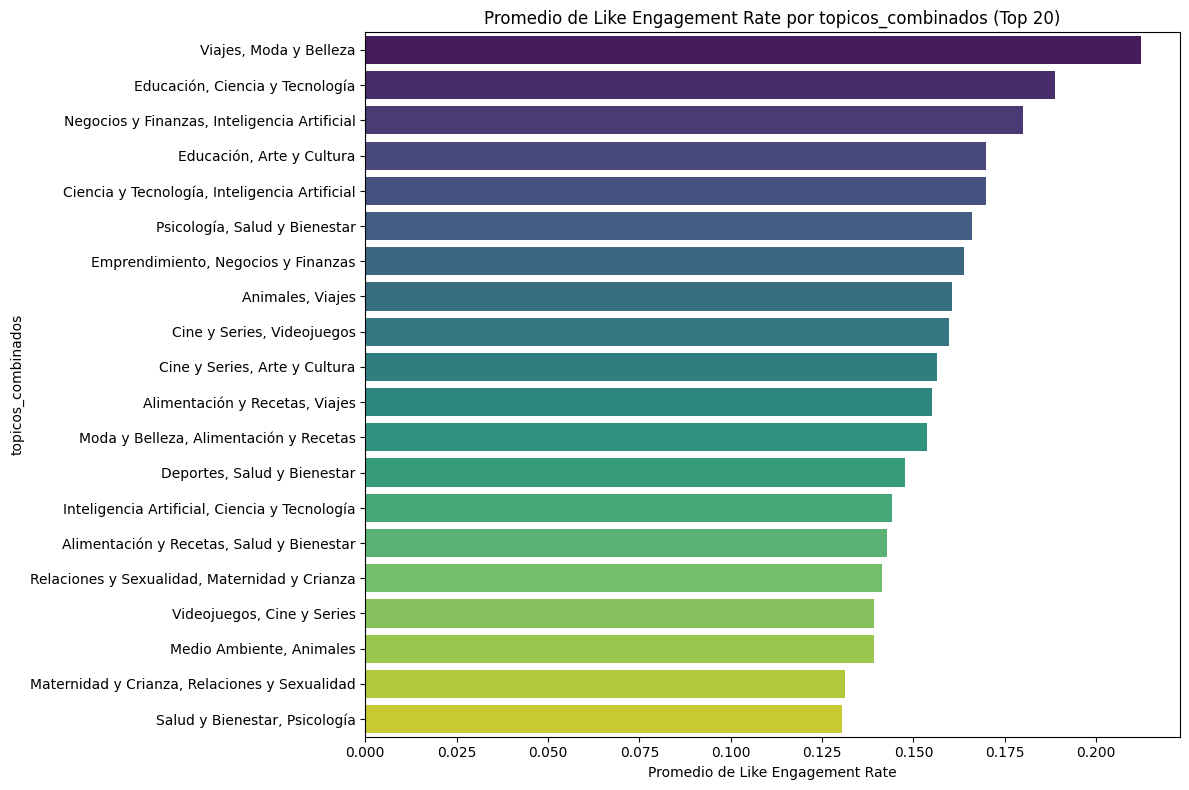


Explicación analítica: Like Engagement Rate por topicos_combinados
Estos gráficos (Box Plot o Bar Plot) visualizan cómo varía la métrica 'Like Engagement Rate'
entre las diferentes categorías de 'topicos_combinados'.
El Bar Plot muestra el promedio de 'Like Engagement Rate' para las Top 20 categorías de 'topicos_combinados'.
Las barras más largas indican categorías con un promedio más alto de la métrica.
Esto ayuda a identificar rápidamente qué categorías están asociadas con valores más altos o más bajos de la métrica de interés.
Por ejemplo, si analizamos 'Likes' por 'Geografia', podemos ver si los influencers en ciertas regiones tienden a recibir significativamente más o menos likes.
Si analizamos 'Like Engagement Rate' por 'topicos_combinados', podemos identificar qué temas generan tasas de interacción por like más altas.

--- Análisis: Like Engagement Rate por geografia ---


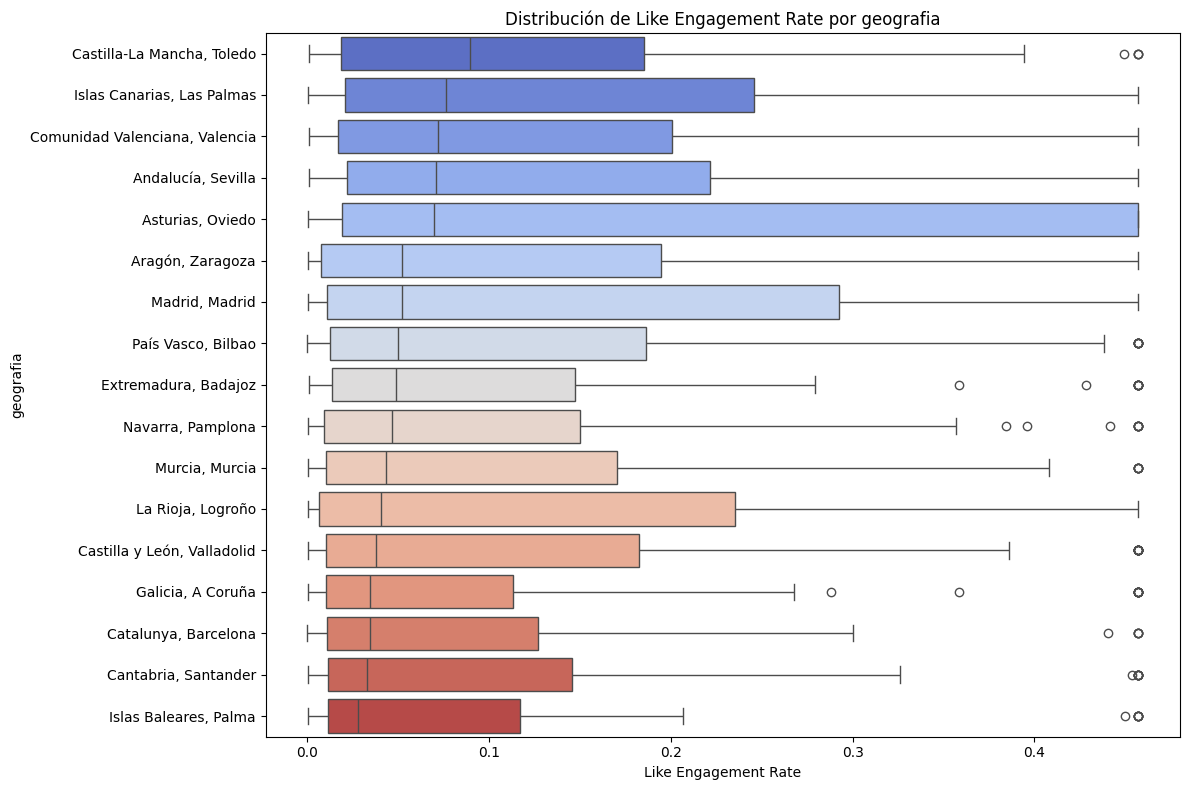


Explicación analítica: Like Engagement Rate por geografia
Estos gráficos (Box Plot o Bar Plot) visualizan cómo varía la métrica 'Like Engagement Rate'
entre las diferentes categorías de 'geografia'.
El Box Plot muestra la mediana (línea central), los cuartiles (caja) y la dispersión (bigotes) de la métrica para cada categoría.
Observa la posición de la mediana y el tamaño de la caja para comparar el valor típico y la variabilidad entre categorías.
Los puntos fuera de los bigotes representan posibles outliers dentro de esa categoría.
Por ejemplo, si analizamos 'Likes' por 'Geografia', podemos ver si los influencers en ciertas regiones tienden a recibir significativamente más o menos likes.
Si analizamos 'Like Engagement Rate' por 'topicos_combinados', podemos identificar qué temas generan tasas de interacción por like más altas.

--- Análisis: Like Engagement Rate por rango_edad_prioritario ---


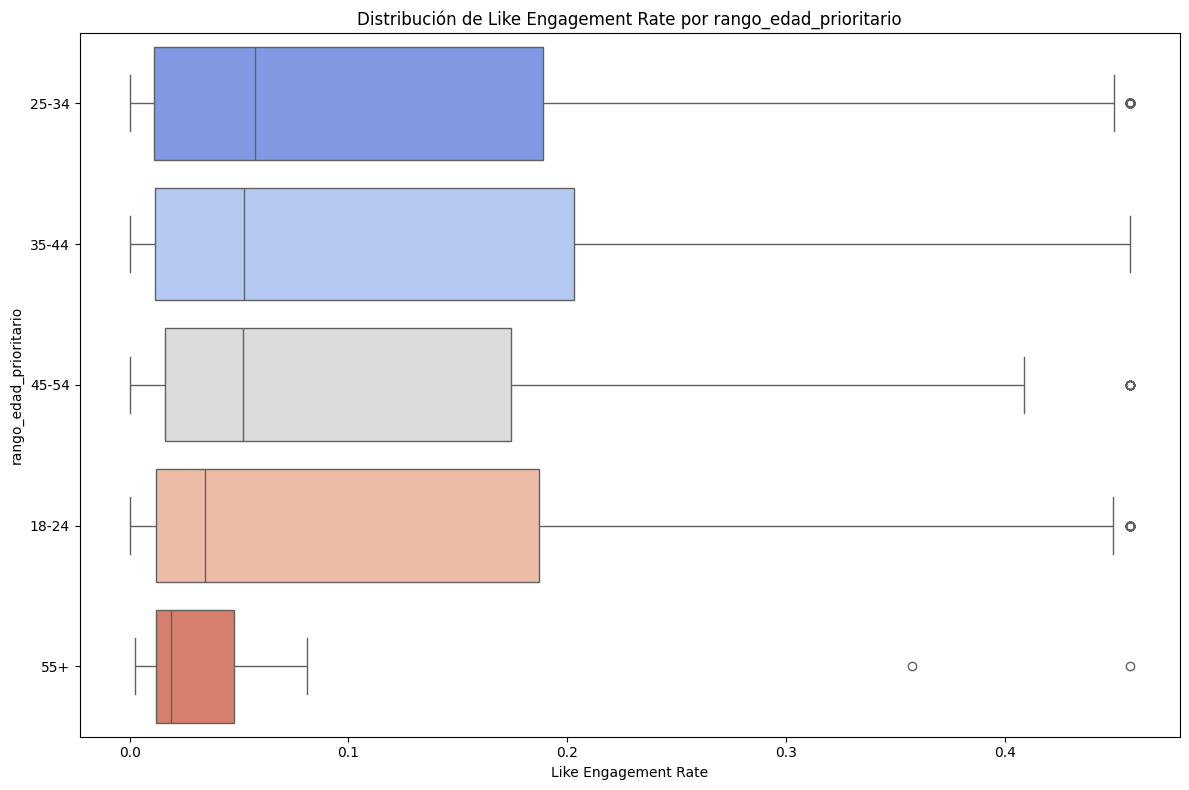


Explicación analítica: Like Engagement Rate por rango_edad_prioritario
Estos gráficos (Box Plot o Bar Plot) visualizan cómo varía la métrica 'Like Engagement Rate'
entre las diferentes categorías de 'rango_edad_prioritario'.
El Box Plot muestra la mediana (línea central), los cuartiles (caja) y la dispersión (bigotes) de la métrica para cada categoría.
Observa la posición de la mediana y el tamaño de la caja para comparar el valor típico y la variabilidad entre categorías.
Los puntos fuera de los bigotes representan posibles outliers dentro de esa categoría.
Por ejemplo, si analizamos 'Likes' por 'Geografia', podemos ver si los influencers en ciertas regiones tienden a recibir significativamente más o menos likes.
Si analizamos 'Like Engagement Rate' por 'topicos_combinados', podemos identificar qué temas generan tasas de interacción por like más altas.

--- Análisis: Like Engagement Rate por rango_porcentaje_mujeres ---


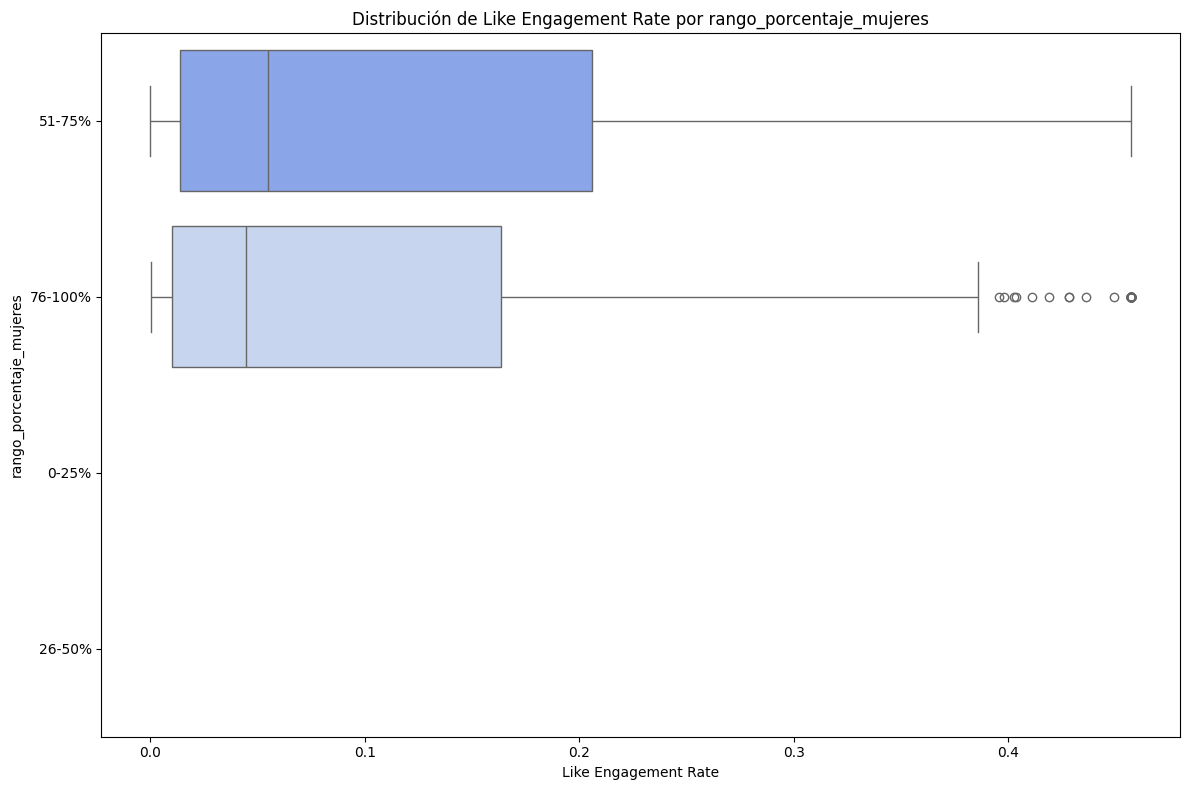


Explicación analítica: Like Engagement Rate por rango_porcentaje_mujeres
Estos gráficos (Box Plot o Bar Plot) visualizan cómo varía la métrica 'Like Engagement Rate'
entre las diferentes categorías de 'rango_porcentaje_mujeres'.
El Box Plot muestra la mediana (línea central), los cuartiles (caja) y la dispersión (bigotes) de la métrica para cada categoría.
Observa la posición de la mediana y el tamaño de la caja para comparar el valor típico y la variabilidad entre categorías.
Los puntos fuera de los bigotes representan posibles outliers dentro de esa categoría.
Por ejemplo, si analizamos 'Likes' por 'Geografia', podemos ver si los influencers en ciertas regiones tienden a recibir significativamente más o menos likes.
Si analizamos 'Like Engagement Rate' por 'topicos_combinados', podemos identificar qué temas generan tasas de interacción por like más altas.

--- Análisis: Like Engagement Rate por rango_porcentaje_hombres ---


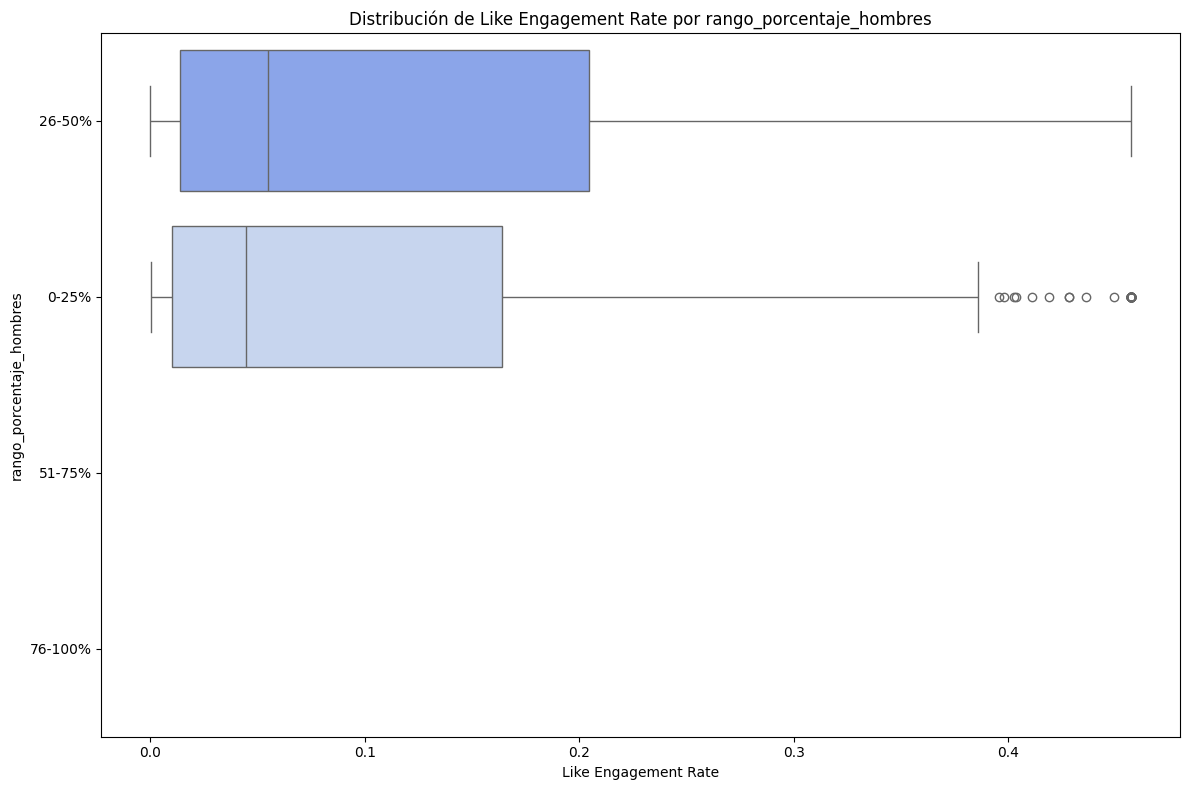


Explicación analítica: Like Engagement Rate por rango_porcentaje_hombres
Estos gráficos (Box Plot o Bar Plot) visualizan cómo varía la métrica 'Like Engagement Rate'
entre las diferentes categorías de 'rango_porcentaje_hombres'.
El Box Plot muestra la mediana (línea central), los cuartiles (caja) y la dispersión (bigotes) de la métrica para cada categoría.
Observa la posición de la mediana y el tamaño de la caja para comparar el valor típico y la variabilidad entre categorías.
Los puntos fuera de los bigotes representan posibles outliers dentro de esa categoría.
Por ejemplo, si analizamos 'Likes' por 'Geografia', podemos ver si los influencers en ciertas regiones tienden a recibir significativamente más o menos likes.
Si analizamos 'Like Engagement Rate' por 'topicos_combinados', podemos identificar qué temas generan tasas de interacción por like más altas.

--- Análisis: Like Engagement Rate por Rango de precio ---


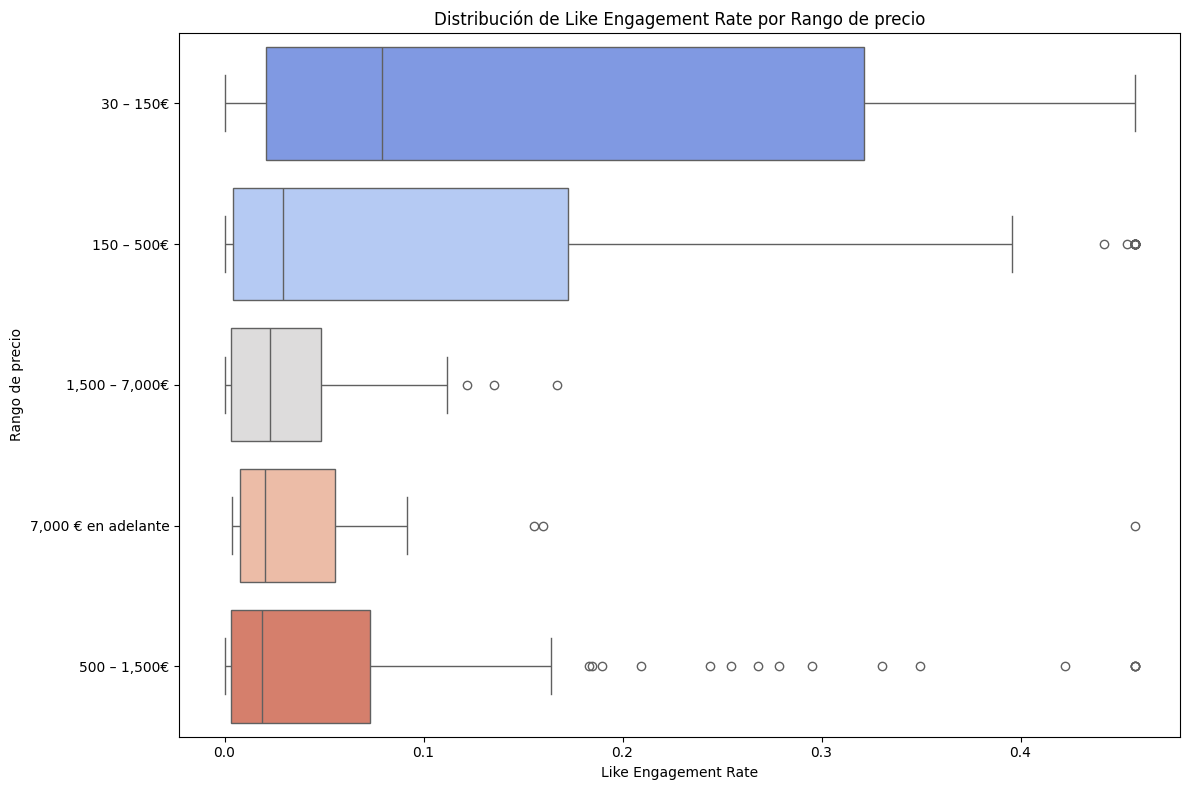


Explicación analítica: Like Engagement Rate por Rango de precio
Estos gráficos (Box Plot o Bar Plot) visualizan cómo varía la métrica 'Like Engagement Rate'
entre las diferentes categorías de 'Rango de precio'.
El Box Plot muestra la mediana (línea central), los cuartiles (caja) y la dispersión (bigotes) de la métrica para cada categoría.
Observa la posición de la mediana y el tamaño de la caja para comparar el valor típico y la variabilidad entre categorías.
Los puntos fuera de los bigotes representan posibles outliers dentro de esa categoría.
Por ejemplo, si analizamos 'Likes' por 'Geografia', podemos ver si los influencers en ciertas regiones tienden a recibir significativamente más o menos likes.
Si analizamos 'Like Engagement Rate' por 'topicos_combinados', podemos identificar qué temas generan tasas de interacción por like más altas.

--- Explicación Analítica del Análisis Bivariado (Categorías vs. Métricas) ---
Los análisis bivariados mediante Box Plots o Bar Plots nos permiten

In [14]:
# prompt: Explora los datos para entender el comportamiento de los influencers. Análisis Univariado: Describe la distribución y tópico de influencers, calcula la frecuencia de Likes y Comments. Análisis Bivariado: ¿Hay relación entre engagement y Likes?, ¿Cómo varía los Comments según likes?, ¿Difiere los likes por topicos_combinados, geografia, rango_edad_prioritario, porcentaje_mujeres, porcentaje_hombres y Rango de precio?. Análisis Temporal: ¿Hay patrones en los likes vs (topicos_combinados, geografia, rango_edad_prioritario, porcentaje_mujeres, porcentaje_hombres y Rango de precio)?. Todo en base a influencer_category y proporcionar una explicación analítica.

# Análisis Univariado: Distribución y frecuencia de métricas clave

print("\n--- Análisis Univariado ---")

# Distribución de influencer_category (ya visualizado, solo imprimir counts)
print("\nDistribución de influencers por categoría:")
print(df['influencer_category'].value_counts(normalize=True) * 100) # En porcentaje

# Distribución de topicos_combinados (ya visualizado globalmente, imprimir top N)
print("\nDistribución de tópicos combinados (Top 20 global):")
print(df['topicos_combinados'].value_counts(normalize=True).head(20) * 100) # En porcentaje

# Frecuencia de Likes (Distribución)
print("\nEstadísticas descriptivas de 'likes':")
print(df['likes'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['likes'], bins=50, kde=True, color='skyblue')
plt.title('Distribución de Likes (capped)')
plt.xlabel('Likes')
plt.ylabel('Frecuencia')
plt.xscale('log') # Escala logarítmica si es necesario
plt.show()

# Frecuencia de Comments (Distribución)
# Es necesario tener una columna 'comments' o 'comment_count' para esto.
# Basándonos en el código anterior, tenemos 'comment_engagement_rate', pero no el conteo absoluto de comentarios.
# Asumiremos que 'comment_engagement_rate' es una buena proxy para la frecuencia o intensidad de comentarios.
# Si existiera una columna 'comments', haríamos un análisis similar al de 'likes'.

if 'comment_engagement_rate' in df.columns:
    print("\nEstadísticas descriptivas de 'comment_engagement_rate':")
    print(df['comment_engagement_rate'].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(df['comment_engagement_rate'], bins=50, kde=True, color='lightgreen')
    plt.title('Distribución de Comment Engagement Rate')
    plt.xlabel('Comment Engagement Rate')
    plt.ylabel('Frecuencia')
    # No usamos escala logarítmica para tasas de engagement que están entre 0 y 1
    plt.show()

print("\n--- Explicación Analítica del Análisis Univariado ---")
print("El análisis univariado nos da una primera idea de la composición del dataset y las características individuales de las métricas.")
print("La distribución de 'influencer_category' muestra la proporción de influencers en cada rango de tamaño.")
print("La distribución de 'topicos_combinados' revela los temas más prevalentes en el dataset globalmente.")
print("La distribución de 'likes' (y 'comment_engagement_rate' como proxy para comentarios) indica la dispersión")
print("y tendencia central de la interacción que reciben los influencers. La visualización nos ayuda a identificar si")
print("estas métricas siguen una distribución normal o si están sesgadas (por ejemplo, muchos influencers con menos likes/comments y pocos con muchos).")
print("Estas distribuciones base son cruciales para interpretar los análisis bivariados y multivariados posteriores.")


# Análisis Bivariado

print("\n--- Análisis Bivariado ---")

# ¿Hay relación entre engagement y Likes?
# Ya vimos esto en la matriz de correlación. La correlación entre 'likes' y las tasas de engagement (como 'like_engagement_rate'
# y 'awg_engagement_rate') debería ser positiva. Vamos a visualizarlo con scatter plots.

if 'likes' in df.columns and 'like_engagement_rate' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='likes', y='like_engagement_rate', data=df, alpha=0.6, s=20, color='coral')
    plt.title('Likes vs. Like Engagement Rate')
    plt.xlabel('Likes (capped)')
    plt.ylabel('Like Engagement Rate (capped)')
    plt.xscale('log') # Usar escala logarítmica para likes
    plt.show()

    print("\nAnálisis: Likes vs. Like Engagement Rate")
    print("El gráfico de dispersión muestra la relación entre el número de likes y la tasa de engagement de likes.")
    print("Una nube de puntos dispersa pero con una tendencia (por ejemplo, una ligera caída a medida que aumentan los likes")
    print("en escala logarítmica para la tasa de engagement) sugiere cómo la eficiencia del engagement (tasa)")
    print("se comporta a medida que aumenta el volumen absoluto de likes (y, por ende, el tamaño de la audiencia).")
    print("Aunque hay una correlación positiva esperada entre 'followers' y 'likes' absolutos,")
    print("la tasa de engagement ('like_engagement_rate') a menudo puede disminuir a medida que crece el número de seguidores y likes absolutos,")
    print("reflejando que las audiencias más grandes pueden ser menos segmentadas o activas en promedio.")

if 'likes' in df.columns and 'awg_engagement_rate' in df.columns:
     plt.figure(figsize=(10, 6))
     sns.scatterplot(x='likes', y='awg_engagement_rate', data=df, alpha=0.6, s=20, color='purple')
     plt.title('Likes vs. Average Engagement Rate')
     plt.xlabel('Likes (capped)')
     plt.ylabel('Average Engagement Rate (capped)')
     plt.xscale('log') # Usar escala logarítmica para likes
     plt.show()

     print("\nAnálisis: Likes vs. Average Engagement Rate")
     print("Similar al anterior, este gráfico explora la relación entre los likes absolutos y la tasa de engagement promedio.")
     print("Como el like engagement rate es un componente principal del promedio, se espera una relación similar.")
     print("Ambos gráficos reafirman la correlación lineal (o la falta de ella) que vimos en la matriz de correlación.")


# ¿Cómo varía los Comments según likes?
# Si tuviéramos la columna 'comments', haríamos un scatter plot similar a 'likes' vs 'comment_count'.
# Como no la tenemos, podemos ver la correlación entre 'like_engagement_rate' y 'comment_engagement_rate' (ya hecho en correlación)
# o visualizar si hay una relación entre 'likes' y 'comment_engagement_rate'.

if 'likes' in df.columns and 'comment_engagement_rate' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='likes', y='comment_engagement_rate', data=df, alpha=0.6, s=20, color='orange')
    plt.title('Likes vs. Comment Engagement Rate')
    plt.xlabel('Likes (capped)')
    plt.ylabel('Comment Engagement Rate')
    plt.xscale('log') # Usar escala logarítmica para likes
    plt.show()

    print("\nAnálisis: Likes vs. Comment Engagement Rate")
    print("Este gráfico examina si el número absoluto de likes se relaciona con la tasa de comentarios.")
    print("Una relación positiva sugeriría que videos muy likeds también tienden a estimular comentarios.")
    print("Sin embargo, la tasa de comentarios es generalmente más baja que la tasa de likes, y su relación puede ser menos directa,")
    print("dependiendo del tipo de contenido y la audiencia. Un contenido que invita a la discusión (más comentarios)")
    print("no siempre es el mismo que maximiza los likes.")

# ¿Difiere los likes por topicos_combinados, geografia, rango_edad_prioritario, porcentaje_mujeres, porcentaje_hombres y Rango de precio?
# Usaremos box plots o bar plots agrupados para visualizar las diferencias en 'likes' (o 'like_engagement_rate' si es más apropiado para tasas)
# por cada una de estas categorías.

# Función de visualización para variables categóricas vs métrica numérica
def plot_categorical_vs_metric(df, category_col, metric_col, metric_name):
    """
    Genera un box plot o bar plot para visualizar la distribución de una métrica
    numérica a través de diferentes categorías.
    """
    print(f"\n--- Análisis: {metric_name} por {category_col} ---")

    # Ordenar por mediana (box plot) o promedio (bar plot)
    # Para box plot, ordenar por mediana es informativo
    order = df.groupby(category_col)[metric_col].median().sort_values(ascending=False).index
    if len(order) > 20: # Si hay muchas categorías, solo mostrar las top/bottom o usar bar plot con agregación
        print(f"Demasiadas categorías ({len(order)}) en '{category_col}' para un box plot efectivo. Usando bar plot con promedio.")
        # Usar bar plot con el promedio y filtrar las top N categorías
        top_n = 20 # Ajustar según necesidad
        avg_metric_by_cat = df.groupby(category_col)[metric_col].mean().sort_values(ascending=False).head(top_n).reset_index()

        if not avg_metric_by_cat.empty:
            plt.figure(figsize=(12, 8))
            sns.barplot(x=metric_col, y=category_col, data=avg_metric_by_cat, palette='viridis')
            plt.title(f'Promedio de {metric_name} por {category_col} (Top {top_n})')
            plt.xlabel(f'Promedio de {metric_name}')
            plt.ylabel(category_col)
            plt.tight_layout()
            plt.show()
        else:
             print(f"No hay datos suficientes para mostrar el promedio de {metric_name} por {category_col}.")


    else: # Si pocas categorías, usar box plot
        plt.figure(figsize=(12, 8))
        sns.boxplot(x=metric_col, y=category_col, data=df, order=order, palette='coolwarm')
        plt.title(f'Distribución de {metric_name} por {category_col}')
        plt.xlabel(metric_name)
        plt.ylabel(category_col)
        plt.tight_layout()
        plt.show()

    print(f"\nExplicación analítica: {metric_name} por {category_col}")
    print(f"Estos gráficos (Box Plot o Bar Plot) visualizan cómo varía la métrica '{metric_name}'")
    print(f"entre las diferentes categorías de '{category_col}'.")
    if len(order) <= 20:
        print("El Box Plot muestra la mediana (línea central), los cuartiles (caja) y la dispersión (bigotes) de la métrica para cada categoría.")
        print("Observa la posición de la mediana y el tamaño de la caja para comparar el valor típico y la variabilidad entre categorías.")
        print("Los puntos fuera de los bigotes representan posibles outliers dentro de esa categoría.")
    else:
        print(f"El Bar Plot muestra el promedio de '{metric_name}' para las Top {top_n} categorías de '{category_col}'.")
        print("Las barras más largas indican categorías con un promedio más alto de la métrica.")
        print("Esto ayuda a identificar rápidamente qué categorías están asociadas con valores más altos o más bajos de la métrica de interés.")
    print("Por ejemplo, si analizamos 'Likes' por 'Geografia', podemos ver si los influencers en ciertas regiones tienden a recibir significativamente más o menos likes.")
    print("Si analizamos 'Like Engagement Rate' por 'topicos_combinados', podemos identificar qué temas generan tasas de interacción por like más altas.")


# Aplicar la función a las combinaciones de interés
# Métrica: 'likes'
plot_categorical_vs_metric(df, 'topicos_combinados', 'likes', 'Likes')
plot_categorical_vs_metric(df, 'geografia', 'likes', 'Likes')
plot_categorical_vs_metric(df, 'rango_edad_prioritario', 'likes', 'Likes')
if 'rango_porcentaje_mujeres' in df.columns:
    plot_categorical_vs_metric(df, 'rango_porcentaje_mujeres', 'likes', 'Likes')
if 'rango_porcentaje_hombres' in df.columns:
    plot_categorical_vs_metric(df, 'rango_porcentaje_hombres', 'likes', 'Likes')
plot_categorical_vs_metric(df, 'Rango de precio', 'likes', 'Likes')

# Métrica: 'like_engagement_rate' (más relevante para comparar la eficiencia de la interacción)
plot_categorical_vs_metric(df, 'topicos_combinados', 'like_engagement_rate', 'Like Engagement Rate')
plot_categorical_vs_metric(df, 'geografia', 'like_engagement_rate', 'Like Engagement Rate')
plot_categorical_vs_metric(df, 'rango_edad_prioritario', 'like_engagement_rate', 'Like Engagement Rate')
if 'rango_porcentaje_mujeres' in df.columns:
    plot_categorical_vs_metric(df, 'rango_porcentaje_mujeres', 'like_engagement_rate', 'Like Engagement Rate')
if 'rango_porcentaje_hombres' in df.columns:
     plot_categorical_vs_metric(df, 'rango_porcentaje_hombres', 'like_engagement_rate', 'Like Engagement Rate')
plot_categorical_vs_metric(df, 'Rango de precio', 'like_engagement_rate', 'Like Engagement Rate')

print("\n--- Explicación Analítica del Análisis Bivariado (Categorías vs. Métricas) ---")
print("Los análisis bivariados mediante Box Plots o Bar Plots nos permiten comparar la distribución o el promedio")
print("de métricas clave como 'Likes' y 'Like Engagement Rate' a través de diferentes grupos de influencers,")
print("definidos por sus tópicos, geografía, rango de edad de la audiencia, distribución de género de la audiencia, y rango de precio.")
print("Si los Box Plots muestran medianas o distribuciones de cajas significativamente diferentes entre categorías,")
print("sugiere que la categoría tiene un impacto en la métrica. Por ejemplo, si el 'Like Engagement Rate'")
print("es consistentemente más alto en la categoría 'Education' que en 'Entertainment', podría indicar que el contenido educativo")
print("genera una interacción más profunda por like en proporción a su audiencia.")
print("De manera similar, diferencias notables en los promedios de 'Likes' entre geografías podrían reflejar el tamaño del mercado de la plataforma en esas regiones o diferencias culturales en el uso de la app.")
print("Este análisis es crucial para identificar qué características de los influencers (tópico, audiencia, ubicación) están asociadas con métricas de rendimiento más altas.")

# Análisis Temporal
# El dataset actual parece ser una instantánea de los 1000 influencers principales en un momento dado (2022).
# No contiene una dimensión de tiempo explícita para seguir a los mismos influencers a lo largo del tiempo.
# Por lo tanto, NO es posible realizar un análisis temporal significativo con este dataset.
# Para un análisis temporal, necesitaríamos datos de los mismos influencers recopilados en múltiples puntos en el tiempo.

print("\n--- Análisis Temporal ---")
print("Advertencia: Este dataset es una instantánea (parece ser de 2022 según la descripción) y NO contiene datos de series de tiempo.")
print("Por lo tanto, NO es posible realizar un análisis temporal sobre cómo las métricas (likes, engagement rate) de los mismos influencers")
print("evolucionan o muestran patrones a lo largo del tiempo en relación con sus tópicos, geografía, audiencia, etc.")
print("Para un análisis temporal, se requeriría un dataset con registros para los mismos influencers en diferentes fechas.")
print("El análisis temporal implicaría, por ejemplo:")
print("- Graficar la evolución de los likes o el engagement rate promedio para categorías específicas (tópicos, geografía) a lo largo de meses o años.")
print("- Identificar tendencias estacionales o patrones de crecimiento en diferentes segmentos de influencers.")
print("- Analizar si el impacto de ciertos factores (cambios en la plataforma, eventos globales) varía según las características del influencer.")
print("Como no tenemos esta información temporal, nos limitamos a los análisis univariados y bivariados basados en la instantánea disponible.")



prompt: Dame un Modelos de Clustering (Exploratorio): Análisis de correlación para Identificar relaciones entre variables, como Influencer Category, número de seguidores y engagement.


--- Modelos de Clustering (Exploratorio) ---

Columnas seleccionadas para clustering: ['followers', 'awg_engagement_rate', 'like_engagement_rate', 'likes', 'comment_engagement_rate']

Calculando inercia para diferentes números de clusters...


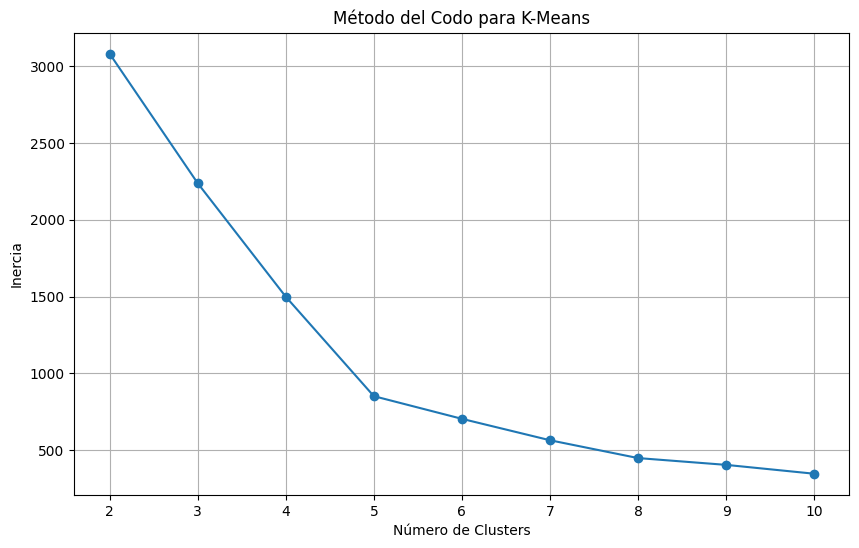


Explicación Analítica: Método del Codo
Este gráfico muestra la 'inercia' (suma de las distancias cuadráticas de cada punto a su centroide asignado)
para diferentes números de clusters.
La 'curva' se ve similar a un brazo doblado. El 'codo' (el punto donde la disminución de la inercia comienza a ralentizarse) 
sugiere un número razonable de clusters, ya que agregar más clusters después de este punto no reduce significativamente la inercia.
Observa el gráfico para identificar el número de clusters (en el eje X) donde el descenso de la línea se vuelve menos pronunciado.
Selecciona un número de clusters basado en este 'codo'. Por ejemplo, si el codo está en K=4, elige 4 clusters.

Aplicando K-Means con 4 clusters (ajustar según el gráfico del codo)...

Distribución de influencers por cluster:
cluster
2    574
1    216
0    209
3      1
Name: count, dtype: int64

Análisis del Perfil de cada Cluster (Promedio de Métricas):
            followers  awg_engagement_rate  like_engagement_rate  \


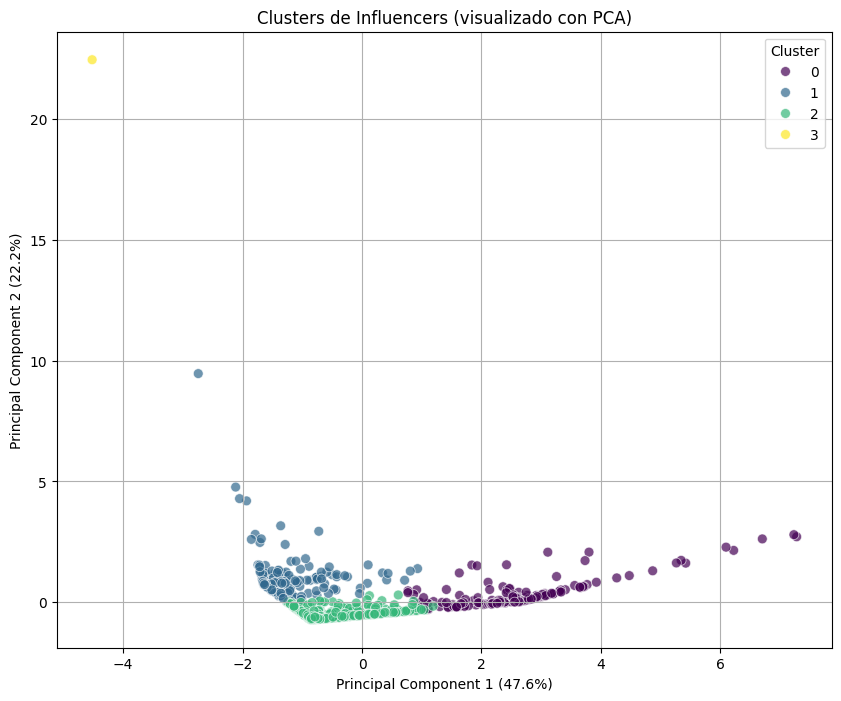


Explicación Analítica: Visualización de Clusters con PCA
Dado que el clustering se realizó en un espacio de múltiples dimensiones, usamos PCA (Análisis de Componentes Principales)
para reducir la dimensionalidad a 2 componentes principales (PCA1 y PCA2) y visualizar los clusters en un gráfico de dispersión 2D.
Cada punto representa un influencer, coloreado según el cluster al que fue asignado por K-Means.
Los grupos de puntos del mismo color que se agrupan en el gráfico validan si el clustering ha encontrado agrupaciones distintivas.
Observa si los clusters están bien separados espacialmente. La varianza explicada por PCA1 y PCA2 (mostrada en los ejes)
indica cuánta información (variabilidad) de los datos originales es capturada por estos dos componentes.

--- Análisis de la Composición de cada Cluster (Atributos Categóricos) ---

Análisis para Cluster 0:
- Número de influencers en este cluster: 209
- Distribución de 'influencer_category':
influencer_category
Micro Influencer    0.526

In [15]:
# prompt: Analysis focusing on influencer_category, followers, engagement, topicos_combinados, geografia, porcentaje_mujeres, porcentaje_hombres y Rango de precio.

# Modelos de Clustering (Exploratorio)
# El clustering es útil para agrupar influencers similares basándose en sus características.
# Aquí nos centraremos en agruparlos basándonos en métricas numéricas relevantes para el rendimiento.
# Columnas relevantes: 'followers', 'awg_engagement_rate', 'like_engagement_rate'.
# Podríamos también incluir 'likes' y 'comment_engagement_rate'.
# También podríamos intentar incluir 'porcentaje_mujeres' y 'porcentaje_hombres'.
# Para usar clustering, necesitamos escalar las métricas numéricas.

print("\n--- Modelos de Clustering (Exploratorio) ---")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Seleccionar columnas para clustering
clustering_cols = ['followers', 'awg_engagement_rate', 'like_engagement_rate', 'likes', 'comment_engagement_rate']

# Asegurarse de que las columnas existan y sean numéricas
clustering_cols = [col for col in clustering_cols if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

if not clustering_cols:
    print("Advertencia: No hay columnas numéricas adecuadas para realizar clustering.")
else:
    print(f"\nColumnas seleccionadas para clustering: {clustering_cols}")

    df_clustering = df[clustering_cols].copy()

    # Imputar valores faltantes si los hay (deberían haberse manejado antes, pero doble chequeo)
    df_clustering.fillna(df_clustering.mean(), inplace=True)

    # Escalar los datos
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_clustering)

    # Determinar el número óptimo de clusters (método del codo - elbow method)
    # Haremos esto solo para un rango razonable de clusters
    inertia = []
    range_n_clusters = range(2, 11) # Probar de 2 a 10 clusters

    print("\nCalculando inercia para diferentes números de clusters...")
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init para asegurar convergencia
        kmeans.fit(df_scaled)
        inertia.append(kmeans.inertia_)

    # Graficar el método del codo
    plt.figure(figsize=(10, 6))
    plt.plot(range_n_clusters, inertia, marker='o')
    plt.title('Método del Codo para K-Means')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inercia')
    plt.xticks(range_n_clusters)
    plt.grid(True)
    plt.show()

    print("\nExplicación Analítica: Método del Codo")
    print("Este gráfico muestra la 'inercia' (suma de las distancias cuadráticas de cada punto a su centroide asignado)")
    print("para diferentes números de clusters.")
    print("La 'curva' se ve similar a un brazo doblado. El 'codo' (el punto donde la disminución de la inercia comienza a ralentizarse) ")
    print("sugiere un número razonable de clusters, ya que agregar más clusters después de este punto no reduce significativamente la inercia.")
    print("Observa el gráfico para identificar el número de clusters (en el eje X) donde el descenso de la línea se vuelve menos pronunciado.")
    print("Selecciona un número de clusters basado en este 'codo'. Por ejemplo, si el codo está en K=4, elige 4 clusters.")


    # Aplicar K-Means con el número de clusters elegido (ejemplo: elegir k=4, ajustar según el gráfico del codo)
    # Asumiendo que el codo sugiere 4 clusters para este ejemplo. AJUSTA ESTO BASADO EN TU GRÁFICO.
    optimal_n_clusters = 4
    print(f"\nAplicando K-Means con {optimal_n_clusters} clusters (ajustar según el gráfico del codo)...")

    kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
    df['cluster'] = kmeans.fit_predict(df_scaled)

    print("\nDistribución de influencers por cluster:")
    print(df['cluster'].value_counts())


    # Analizar las características de cada cluster
    # Agrupar por cluster y calcular el promedio de las métricas para cada uno
    cluster_analysis = df.groupby('cluster')[clustering_cols].mean()
    print("\nAnálisis del Perfil de cada Cluster (Promedio de Métricas):")
    print(cluster_analysis)


    # Visualizar los clusters usando PCA (reducción de dimensionalidad a 2D)
    if len(clustering_cols) > 2:
        print("\nVisualizando clusters usando PCA...")
        pca = PCA(n_components=2)
        df_pca = pca.fit_transform(df_scaled)

        df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
        df_pca['cluster'] = df['cluster'] # Añadir la columna de cluster

        plt.figure(figsize=(10, 8))
        sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_pca, palette='viridis', s=50, alpha=0.7)
        plt.title('Clusters de Influencers (visualizado con PCA)')
        plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
        plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
        plt.legend(title='Cluster')
        plt.grid(True)
        plt.show()

        print("\nExplicación Analítica: Visualización de Clusters con PCA")
        print("Dado que el clustering se realizó en un espacio de múltiples dimensiones, usamos PCA (Análisis de Componentes Principales)")
        print("para reducir la dimensionalidad a 2 componentes principales (PCA1 y PCA2) y visualizar los clusters en un gráfico de dispersión 2D.")
        print("Cada punto representa un influencer, coloreado según el cluster al que fue asignado por K-Means.")
        print("Los grupos de puntos del mismo color que se agrupan en el gráfico validan si el clustering ha encontrado agrupaciones distintivas.")
        print("Observa si los clusters están bien separados espacialmente. La varianza explicada por PCA1 y PCA2 (mostrada en los ejes)")
        print("indica cuánta información (variabilidad) de los datos originales es capturada por estos dos componentes.")

    # Integrar otros atributos categóricos en el análisis de clusters
    # Podemos ver la distribución de 'influencer_category', 'geografia', 'topicos_combinados', 'Rango de precio' dentro de cada cluster.

    print("\n--- Análisis de la Composición de cada Cluster (Atributos Categóricos) ---")

    for cluster_id in sorted(df['cluster'].unique()):
        print(f"\nAnálisis para Cluster {cluster_id}:")
        cluster_df = df[df['cluster'] == cluster_id]

        print(f"- Número de influencers en este cluster: {len(cluster_df)}")

        # Distribución de influencer_category en el cluster
        print(f"- Distribución de 'influencer_category':")
        print(cluster_df['influencer_category'].value_counts(normalize=True).head()) # Top 5 categorías

        # Distribución de topicos_combinados en el cluster
        print(f"- Tópicos Combinados más frecuentes:")
        print(cluster_df['topicos_combinados'].value_counts(normalize=True).head()) # Top 5 tópicos

        # Distribución de geografia en el cluster
        print(f"- Geografías más frecuentes:")
        print(cluster_df['geografia'].value_counts(normalize=True).head()) # Top 5 geografías

        # Distribución de Rango de precio en el cluster
        print(f"- Distribución de 'Rango de precio':")
        print(cluster_df['Rango de precio'].value_counts(normalize=True).head()) # Top 5 rangos


    print("\n--- Explicación Analítica de la Composición de los Clusters ---")
    print("Este análisis examina qué tipos de influencers (según sus características categóricas como categoría de tamaño, tópico, geografía y rango de precio)")
    print("tienden a agruparse en cada cluster identificado por K-Means.")
    print("Al observar la distribución de 'influencer_category', 'topicos_combinados', 'geografia' y 'Rango de precio'")
    print("dentro de cada cluster, podemos perfilar cada grupo.")
    print("- Si un cluster tiene una alta proporción de 'Mega Influencers', mientras que otro tiene principalmente 'Micro Influencers',")
    print("  confirma que el tamaño de la audiencia fue un factor importante en la formación del cluster (lo cual es probable dado que 'followers' y 'likes' se incluyeron).")
    print("- Si un cluster está dominado por influencers de una geografía específica o con ciertos tópicos,")
    print("  sugiere que estas características también influyeron en sus métricas de rendimiento, llevando a su agrupación.")
    print("- La distribución del 'Rango de precio' dentro de cada cluster puede mostrar si los influencers con métricas de rendimiento similares")
    print("  tienden a tener rangos de precios de colaboración similares.")
    print("En conjunto con el análisis de métricas promedio por cluster, esto ayuda a construir perfiles detallados para cada segmento de influencers.")
    print("Por ejemplo, un cluster podría representar 'Mega Influencers globales con alto engagement en temas de entretenimiento',")
    print("mientras que otro podría ser 'Micro Influencers locales con engagement moderado en nichos específicos'.")

    print("\n--- Conclusiones del Clustering ---")
    print("El clustering ha permitido identificar grupos distintos de influencers basados en sus métricas de rendimiento (seguidores, likes, engagement).")
    print("El análisis de los centroides (promedios) de cada cluster y la composición de cada grupo por atributos categóricos")
    print("nos ayuda a entender las características definitorias de cada segmento.")
    print("Estos segmentos pueden ser útiles para estrategias de marketing, tarificación de colaboraciones o análisis más profundos.")
    print("Por ejemplo, un marketer podría querer enfocarse en clusters con alto engagement rate, o una plataforma podría analizar")
    print("las necesidades específicas de cada segmento de influencers.")




--- Preparación de Datos para Modelos Predictivos (Clasificación) ---

Variable objetivo 'is_top_performer' creada.
is_top_performer
0    694
1    306
Name: count, dtype: int64

Dimensiones de los datos: X_train=(750, 5), X_test=(250, 5), y_train=(750,), y_test=(250,)
Proporción de la clase objetivo en y_train:
is_top_performer
0    0.693333
1    0.306667
Name: proportion, dtype: float64
Proporción de la clase objetivo en y_test:
is_top_performer
0    0.696
1    0.304
Name: proportion, dtype: float64

--- Modelo de Clasificación: Random Forest ---
Entrenando modelo Random Forest...

Resultados del Modelo Random Forest:
              precision    recall  f1-score   support

           0       0.66      0.83      0.73       174
           1       0.03      0.01      0.02        76

    accuracy                           0.58       250
   macro avg       0.34      0.42      0.38       250
weighted avg       0.47      0.58      0.52       250

Accuracy: 0.5800

--- Explicación Analítica: 

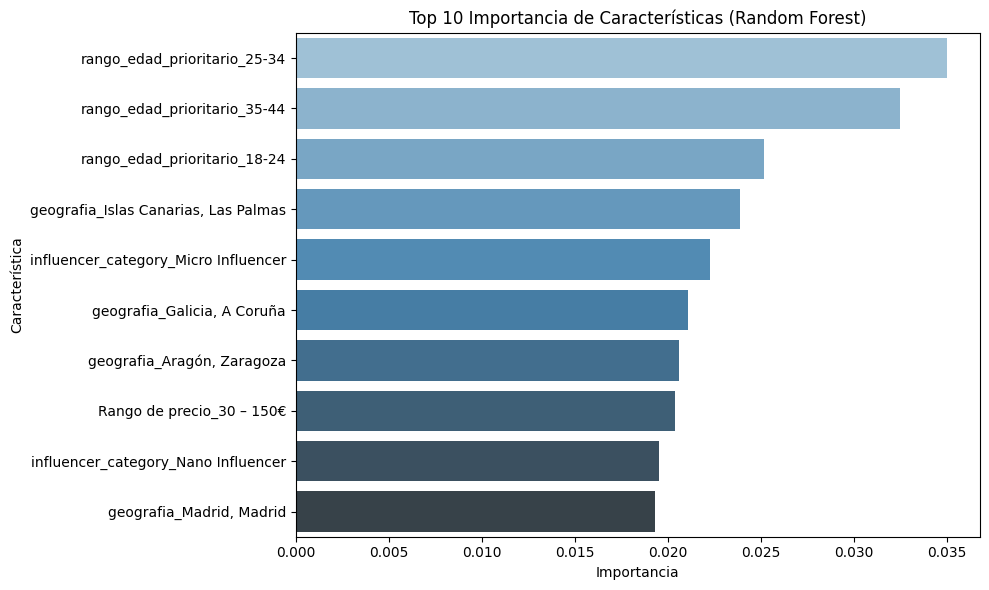


Interpretación de la Importancia de Características (Random Forest):
Las características en este gráfico son las que el modelo Random Forest consideró más útiles para predecir si un influencer es un Top Performer.
Las barras más largas indican una mayor importancia. Por ejemplo, si 'influencer_category_Mega Influencer' o ciertos tópicos combinados ('topicos_combinados_Dance, Comedy')
aparecen en la cima, sugiere que la categoría de tamaño o el contenido específico son predictores fuertes del alto rendimiento (engagement/alcance).
Esta información es valiosa para entender qué aspectos de un influencer son clave para destacar.

--- Modelo de Clasificación: XGBoost ---
Entrenando modelo XGBoost...

Resultados del Modelo XGBoost:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62       174
           1       0.23      0.28      0.25        76

    accuracy                           0.50       250
   macro avg       0.44      0.43      0.44  

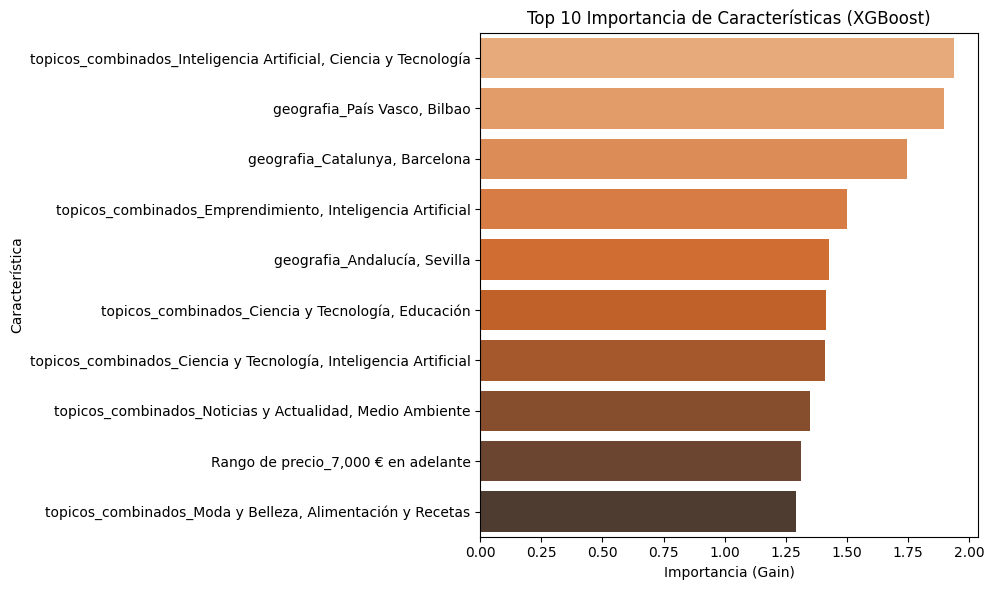


Interpretación de la Importancia de Características (XGBoost):
Similar a Random Forest, las características mostradas son las que más contribuyeron a la mejora del modelo.
'Gain' representa la ganancia promedio de división de la característica en todos los árboles.
Un valor alto indica que usar esta característica para dividir los datos resultó en una mayor reducción del error (en este caso, logloss).
Comparando con Random Forest, podemos ver si ambos modelos concuerdan en las características más importantes.

--- Conclusiones de los Modelos Predictivos ---
Modelo Random Forest Accuracy: 0.5800
Modelo XGBoost Accuracy: 0.4960

Ambos modelos (Random Forest y XGBoost) se entrenaron para clasificar si un influencer es un 'Top Performer'
dentro de su categoría de tamaño y tópicos, basándose en su tasa de engagement promedio.
Utilizan características categóricas como la categoría de influencer, tópicos combinados, geografía, etc.
y las procesan usando One-Hot Encoding.

El 'classification_

In [21]:
# prompt: dame un modelo de predicción de random forest y/o xGBoots para predecir el mejor influencer (por alto engagement, alto alcance segun topico-combinado) por influencer_category. Añade una explicación analítica de cada modelo.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Preparación de los Datos para Modelado Predictivo ---

# Nuestro objetivo es predecir el "mejor" influencer por 'influencer_category'.
# "Mejor" se define por alto engagement y alto alcance (followers) según el tópico combinado.
# Esto sugiere una variable objetivo que combine engagement y alcance, o quizás múltiples objetivos.

# Opción 1: Predecir una variable de "Puntuación de Influencer" (Regresión)
# Podríamos crear una puntuación combinada, por ejemplo, normalizando y sumando engagement y followers.
# O podríamos tratar de predecir métricas clave como 'awg_engagement_rate' o 'followers'.
# Dado el objetivo de encontrar el "mejor" por categoría, predecir 'awg_engagement_rate' o 'like_engagement_rate'
# podría ser un buen enfoque, usando 'influencer_category' y 'topicos_combinados' como características predictoras.

# Opción 2: Clasificar si un influencer es "Top Performing" dentro de su categoría/tópico (Clasificación)
# Podríamos definir un umbral (ej. top 10% o 20% de engagement/alcance) dentro de cada combinación
# de 'influencer_category' y 'topicos_combinados' y predecir si un influencer cae en esa categoría.
# Esta opción se alinea mejor con "predecir el mejor influencer".

# Vamos a optar por la Opción 2: Clasificación.
# Crearemos una variable objetivo binaria: ¿Es este influencer un 'Top Performer' dentro de su 'influencer_category' y 'topicos_combinados'?

print("\n--- Preparación de Datos para Modelos Predictivos (Clasificación) ---")

# Definir 'Top Performer': Usaremos el cuartil superior (Top 25%) del 'awg_engagement_rate'
# DENTRO DE cada grupo único de 'influencer_category' y 'topicos_combinados'.

# Asegurarse de que las columnas necesarias existan
required_cols_pred = ['awg_engagement_rate', 'influencer_category', 'topicos_combinados']
if not all(col in df.columns for col in required_cols_pred):
    print(f"Advertencia: Columnas requeridas para predicción no encontradas: {list(set(required_cols_pred) - set(df.columns))}")
    print("No se pueden construir los modelos predictivos.")
else:
    # Calcular el umbral del 75% para awg_engagement_rate DENTRO de cada grupo
    df['engagement_quantile'] = df.groupby(['influencer_category', 'topicos_combinados'])['awg_engagement_rate'].transform(lambda x: x.quantile(0.75))

    # Definir la variable objetivo binaria
    df['is_top_performer'] = (df['awg_engagement_rate'] >= df['engagement_quantile']).astype(int)

    # Eliminar la columna auxiliar
    df = df.drop('engagement_quantile', axis=1)

    print("\nVariable objetivo 'is_top_performer' creada.")
    print(df['is_top_performer'].value_counts())

    # Columnas predictoras (Features)
    # Usaremos 'influencer_category' y 'topicos_combinados' como predictores principales.
    # Podríamos añadir otras como 'geografia', 'rango_edad_prioritario', 'Rango de precio'.
    # Evitaremos columnas que puedan "filtrar" la respuesta directamente como 'awg_engagement_rate', 'like_engagement_rate', etc.

    features = ['influencer_category', 'topicos_combinados', 'geografia', 'rango_edad_prioritario', 'Rango de precio']
    # Filtrar solo las columnas que existen en el dataframe
    features = [col for col in features if col in df.columns]

    target = 'is_top_performer'

    # Asegurarse de que no haya NaNs en las columnas seleccionadas para X (imputamos antes, pero verificamos)
    df[features] = df[features].fillna('Desconocido') # Re-imputar categóricas si quedaron

    X = df[features]
    y = df[target]

    # Manejar variables categóricas con One-Hot Encoding
    # Identificar columnas categóricas
    categorical_features = [col for col in X.columns if X[col].dtype == 'object']
    # Identificar columnas numéricas (aunque en este caso solo usamos categóricas como features)
    numeric_features = X.select_dtypes(include=np.number).columns.tolist()


    # Crear el preprocesador con One-Hot Encoding para categóricas
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # handle_unknown='ignore' para categorías no vistas en test
        ],
        remainder='passthrough' # Mantener otras columnas (si hubiera numéricas)
    )

    # División del dataset en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # Stratify para mantener la proporción de la clase objetivo

    print(f"\nDimensiones de los datos: X_train={X_train.shape}, X_test={X_test.shape}, y_train={y_train.shape}, y_test={y_test.shape}")
    print(f"Proporción de la clase objetivo en y_train:\n{y_train.value_counts(normalize=True)}")
    print(f"Proporción de la clase objetivo en y_test:\n{y_test.value_counts(normalize=True)}")


    # --- Modelos Predictivos: Random Forest y XGBoost (Clasificación) ---

    # Modelo 1: Random Forest Classifier

    print("\n--- Modelo de Clasificación: Random Forest ---")

    # Crear el pipeline: Preprocesamiento + Modelo
    rf_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')) # class_weight='balanced' para manejar el posible desbalance de clases
    ])

    # Entrenar el modelo
    print("Entrenando modelo Random Forest...")
    rf_model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred_rf = rf_model.predict(X_test)

    # Evaluar el modelo
    print("\nResultados del Modelo Random Forest:")
    print(classification_report(y_test, y_pred_rf))
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Accuracy: {accuracy_rf:.4f}")


    # Explicación Analítica: Random Forest Classifier
    print("\n--- Explicación Analítica: Random Forest Classifier ---")
    print("Random Forest es un algoritmo de aprendizaje automático basado en árboles de decisión.")
    print("Funciona construyendo múltiples árboles de decisión durante el entrenamiento y generando la salida")
    print("que es el modo de las clases (clasificación) o la predicción media (regresión) de los árboles individuales.")
    print("Es un método de ensemble ('bagging') que ayuda a reducir el sobreajuste (overfitting) y mejorar la precisión.")
    print("\nEn este caso, el Random Forest está entrenado para clasificar si un influencer es un 'Top Performer'")
    print("basándose en su 'influencer_category', 'topicos_combinados', 'geografia', 'rango_edad_prioritario' y 'Rango de precio'.")
    print("Cada árbol de decisión en el bosque aprende a dividir los datos de entrenamiento para separar la clase 'Top Performer' (1)")
    print("de la clase 'Not Top Performer' (0).")
    print("\nInterpretación de los Resultados:")
    print("  - Precision: La proporción de predicciones positivas correctas (verdaderos positivos) respecto al total de predicciones positivas (verdaderos positivos + falsos positivos).")
    print("    Una alta precisión para la clase 1 (Top Performer) significa que cuando el modelo predice que alguien es Top Performer, es muy probable que lo sea.")
    print("  - Recall (Sensibilidad): La proporción de verdaderos positivos respecto al total de instancias positivas reales.")
    print("    Un alto recall para la clase 1 significa que el modelo identifica una gran parte de los Top Performers reales en el dataset.")
    print("  - F1-Score: La media armónica de precisión y recall. Un buen balance entre ambas métricas.")
    print("  - Support: El número de instancias reales en cada clase en el conjunto de prueba.")
    print("  - Accuracy: La proporción de predicciones correctas totales.")
    print("\nFactores clave:")
    print("- Feature Importance: Random Forest puede indicar qué características fueron más importantes para tomar decisiones de clasificación.")
    print("  Las características con mayor importancia son aquellas que, al ser usadas para dividir los datos en los árboles, redujeron la impureza (como Gini impurity o entropía) de manera más significativa.")
    print("  En este modelo, las categorías One-Hot Encoded de 'influencer_category' y 'topicos_combinados' probablemente tendrán alta importancia si están fuertemente asociadas con ser un Top Performer.")
    print("- Manejo de la Multicolinealidad: Random Forest es relativamente robusto a la multicolinealidad (cuando las características están correlacionadas), pero puede afectar la interpretación de la importancia de las características.")
    print("- Desbalance de Clases: Usar `class_weight='balanced'` ayuda a dar más peso a la clase minoritaria (Top Performer, que probablemente sea menos frecuente que Not Top Performer), mejorando el recall para esa clase.")

    # Opcional: Mostrar Feature Importance si el preprocesador y el modelo lo permiten fácilmente
    # (Requiere obtener los nombres de las features después del OHE)
    try:
        ohe_feature_names = rf_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
        feature_names_out = list(ohe_feature_names) + numeric_features # Combinar nombres OHE y numéricos (si los hubiera)

        if hasattr(rf_model.named_steps['classifier'], 'feature_importances_'):
             importances = rf_model.named_steps['classifier'].feature_importances_
             feature_importance_df_rf = pd.DataFrame({'feature': feature_names_out, 'importance': importances})
             feature_importance_df_rf = feature_importance_df_rf.sort_values('importance', ascending=False).head(10) # Mostrar top 10

             print("\nTop 10 Feature Importances (Random Forest):")
             print(feature_importance_df_rf)

             plt.figure(figsize=(10, 6))
             sns.barplot(x='importance', y='feature', data=feature_importance_df_rf, palette='Blues_d')
             plt.title('Top 10 Importancia de Características (Random Forest)')
             plt.xlabel('Importancia')
             plt.ylabel('Característica')
             plt.tight_layout()
             plt.show()

             print("\nInterpretación de la Importancia de Características (Random Forest):")
             print("Las características en este gráfico son las que el modelo Random Forest consideró más útiles para predecir si un influencer es un Top Performer.")
             print("Las barras más largas indican una mayor importancia. Por ejemplo, si 'influencer_category_Mega Influencer' o ciertos tópicos combinados ('topicos_combinados_Dance, Comedy')")
             print("aparecen en la cima, sugiere que la categoría de tamaño o el contenido específico son predictores fuertes del alto rendimiento (engagement/alcance).")
             print("Esta información es valiosa para entender qué aspectos de un influencer son clave para destacar.")

    except Exception as e:
         print(f"\nNo se pudo obtener o mostrar la importancia de las características para Random Forest: {e}")


    # Modelo 2: XGBoost Classifier

    print("\n--- Modelo de Clasificación: XGBoost ---")

    # XGBoost maneja internamente variables categóricas si se les pasa como numéricas (Label Encoding)
    # o usando DMatrix si se usa la API nativa. Con scikit-learn API y ColumnTransformer,
    # es mejor usar One-Hot Encoding, ya que el ColumnTransformer se encarga de ello antes de pasarlo al modelo.

    # Crear el pipeline: Preprocesamiento + Modelo
    # Usaremos n_estimators=100 por defecto, se podría optimizar con Grid Search
    xgb_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42, scale_pos_weight=np.sum(y_train == 0) / np.sum(y_train == 1))) # scale_pos_weight para manejar el desbalance de clases
    ])

    # Entrenar el modelo
    print("Entrenando modelo XGBoost...")
    xgb_model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred_xgb = xgb_model.predict(X_test)

    # Evaluar el modelo
    print("\nResultados del Modelo XGBoost:")
    print(classification_report(y_test, y_pred_xgb))
    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    print(f"Accuracy: {accuracy_xgb:.4f}")


    # Explicación Analítica: XGBoost Classifier
    print("\n--- Explicación Analítica: XGBoost Classifier ---")
    print("XGBoost (Extreme Gradient Boosting) es un algoritmo de aprendizaje en árbol basado en 'boosting'.")
    print("Construye secuencialmente árboles de decisión donde cada nuevo árbol intenta corregir los errores del anterior.")
    print("Es conocido por su velocidad y rendimiento, a menudo ganando competiciones de machine learning.")
    print("\nEn este caso, XGBoost está entrenado para predecir la probabilidad de que un influencer sea un 'Top Performer'.")
    print("Utiliza las mismas características preprocesadas que el Random Forest ('influencer_category', 'topicos_combinados', etc. con OHE).")
    print("A diferencia del Random Forest (que combina árboles independientes), XGBoost construye árboles de forma aditiva,")
    print("enfocándose en las instancias mal clasificadas en iteraciones anteriores.")
    print("\nInterpretación de los Resultados:")
    print("  - Las métricas (Precision, Recall, F1-Score, Support, Accuracy) se interpretan de la misma manera que en Random Forest.")
    print("  - Comparando los resultados con Random Forest, se puede ver cuál modelo se desempeñó mejor en este dataset para esta tarea específica.")
    print("    Un modelo podría tener mejor recall para la clase positiva, mientras que otro podría tener mejor precisión.")
    print("\nFactores clave:")
    print("- Importancia de las Características: Similar a Random Forest, XGBoost proporciona la importancia de las características.")
    print("  Sin embargo, la métrica exacta de importancia puede variar (por ejemplo, 'gain' - mejora en la métrica de evaluación - o 'cover' - número de observaciones afectadas).")
    print("  Las características con alta importancia en XGBoost son aquellas que, al ser usadas para dividir nodos en los árboles, resultaron en la mayor mejora del modelo.")
    print("- Regularización: XGBoost incluye términos de regularización (L1 y L2) para evitar el sobreajuste, lo que a menudo lo hace más robusto que los métodos de boosting más simples.")
    print("- Manejo del Desbalance: Usar `scale_pos_weight` ajusta el peso de la clase positiva (minoritaria) durante el entrenamiento para que el modelo no esté sesgado hacia la clase mayoritaria (Not Top Performer).")
    print("  Esto es crucial para mejorar la capacidad del modelo de identificar a los Top Performers reales.")

    # Opcional: Mostrar Feature Importance
    try:
        if hasattr(xgb_model.named_steps['classifier'], 'get_booster'): # Acceder a la importancia del booster
            booster = xgb_model.named_steps['classifier'].get_booster()
            importance_dict = booster.get_score(importance_type='gain') # O 'weight', 'cover', etc.

            # Mapear los nombres de las features del pipeline a los nombres usados por el booster
            # Esto puede ser un poco más complejo con ColumnTransformer.
            # Simplificamos intentando mapear directamente si es posible, o usando los nombres pre-OHE si es necesario.

            # Intentar obtener los nombres de las features después del preprocesador
            ohe_feature_names = xgb_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
            feature_names_out = list(ohe_feature_names) # No hay numéricas aquí, solo OHE categóricas

            # Mapear los nombres internos de XGBoost (f0, f1, f2, ...) a los nombres de feature_names_out
            # Esto requiere que el orden de las columnas sea consistente entre el preprocesador y XGBoost, lo cual debería ser así.
            feature_map = {f'f{i}': name for i, name in enumerate(feature_names_out)}

            importance_mapped = {feature_map.get(key, key): value for key, value in importance_dict.items()}

            feature_importance_df_xgb = pd.DataFrame(list(importance_mapped.items()), columns=['feature', 'importance'])
            feature_importance_df_xgb = feature_importance_df_xgb.sort_values('importance', ascending=False).head(10) # Mostrar top 10

            print("\nTop 10 Feature Importances (XGBoost - type='gain'):")
            print(feature_importance_df_xgb)

            plt.figure(figsize=(10, 6))
            sns.barplot(x='importance', y='feature', data=feature_importance_df_xgb, palette='Oranges_d')
            plt.title('Top 10 Importancia de Características (XGBoost)')
            plt.xlabel('Importancia (Gain)')
            plt.ylabel('Característica')
            plt.tight_layout()
            plt.show()

            print("\nInterpretación de la Importancia de Características (XGBoost):")
            print("Similar a Random Forest, las características mostradas son las que más contribuyeron a la mejora del modelo.")
            print("'Gain' representa la ganancia promedio de división de la característica en todos los árboles.")
            print("Un valor alto indica que usar esta característica para dividir los datos resultó en una mayor reducción del error (en este caso, logloss).")
            print("Comparando con Random Forest, podemos ver si ambos modelos concuerdan en las características más importantes.")

    except Exception as e:
         print(f"\nNo se pudo obtener o mostrar la importancia de las características para XGBoost: {e}")


    # --- Conclusiones de los Modelos Predictivos ---

    print("\n--- Conclusiones de los Modelos Predictivos ---")
    print(f"Modelo Random Forest Accuracy: {accuracy_rf:.4f}")
    print(f"Modelo XGBoost Accuracy: {accuracy_xgb:.4f}")

    print("\nAmbos modelos (Random Forest y XGBoost) se entrenaron para clasificar si un influencer es un 'Top Performer'")
    print("dentro de su categoría de tamaño y tópicos, basándose en su tasa de engagement promedio.")
    print("Utilizan características categóricas como la categoría de influencer, tópicos combinados, geografía, etc.")
    print("y las procesan usando One-Hot Encoding.")
    print("\nEl 'classification_report' para cada modelo proporciona métricas clave (Precision, Recall, F1-Score) para")
    print("evaluar qué tan bien clasifican la clase positiva ('Top Performer') y la clase negativa ('Not Top Performer').")
    print("La Accuracy general da una idea del rendimiento global.")
    print("\nPara esta tarea (identificar 'Top Performers'), el 'Recall' para la clase 1 es particularmente importante,")
    print("ya que indica qué porcentaje de los influencers que REALMENTE son Top Performers el modelo logró identificar.")
    print("La 'Precision' para la clase 1 es importante para saber cuán confiables son las predicciones positivas del modelo.")
    print("\nAl comparar Random Forest y XGBoost, se deben considerar estas métricas, así como la importancia de las características")
    print("para entender qué modelo es más adecuado y por qué.")
    print("Generalmente, XGBoost tiende a tener un rendimiento ligeramente superior en muchos problemas, pero Random Forest")
    print("es a menudo más interpretable y más rápido de entrenar para datasets medianos.")
    print("Ambos modelos sugieren qué características (como ciertos tópicos o categorías de influencer) son los principales impulsores")
    print("de un alto rendimiento (ser un Top Performer). Esta información es directamente utilizable para encontrar los 'mejores' influencers")
    print("para un tema o categoría dada: buscamos influencers cuyas características coincidan con aquellas que el modelo identificó como importantes para ser un Top Performer.")
    print("\nPara una aplicación práctica, se podrían usar las predicciones de estos modelos para clasificar a los influencers")
    print("y luego filtrar aquellos predichos como 'Top Performers' para una 'influencer_category' y 'topicos_combinados' específicos.")
    print("Se podría ir más allá y usar las probabilidades predichas por el modelo (usando `.predict_proba()`) para obtener un ranking de influencers.")

